<a href="https://colab.research.google.com/github/JulioLaz/Supermarket_Sales_Analysis/blob/main/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Configuración del ambiente

In [1]:
# !python -V
# print('------')
# !pip show Pandas | grep 'Name\|Version'
# print('------')
# !pip show Matplotlib | grep 'Name\|Version'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as mtick
import warnings

In [3]:
global df_ventas, df_ventas_limpio, df_ventas_año

# 2- Obtención de datos

In [4]:
def obtencion_datos():
  global df_ventas, df_ventas_limpio

  df_ventas=pd.read_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/reporte_ventas.csv')
  return df_ventas

In [5]:
obtencion_datos()

fecha_pedido fecha_envio        modo_envio          nombre_cliente  \
0      2021-11-09  2021-11-12         Económico         Thiago Silveira   
1      2021-11-09  2021-11-12         Económico         Thiago Silveira   
2      2021-06-13  2021-06-17         Económico           Giovanna Lima   
3      2020-10-12  2020-10-19  Entrega estándar       Ana Júlia da Cruz   
4      2020-10-12  2020-10-19  Entrega estándar       Ana Júlia da Cruz   
...           ...         ...               ...                     ...   
8949   2020-06-19  2020-06-21      Envío rápido          Isabel Almeida   
8950   2020-06-19  2020-06-21      Envío rápido          Isabel Almeida   
8951   2021-12-04  2021-12-07      Envío rápido              Isis Alves   
8952   2021-06-15  2021-06-15          24 horas  Gustavo Henrique Porto   
8953   2021-09-03  2021-09-05      Envío rápido            Thales Pires   

     segmento_cliente          ciudad          estado   region  \
0                 B2C  Ribeirão Preto       São Paulo  Sureste   
1                 B2C  Ribeirão Preto       São Paulo  Sureste   
2                 B2B  Rio de Janeiro  Rio de Janeiro  Sureste   
3                 B2C   Foz do Iguaçu          Paraná      Sur   
4                 B2C   Foz do Iguaçu          Paraná      Sur   
...               ...             ...             ...      ...   
8949              B2B     São Vicente       São Paulo  Sureste   
8950              B2B     São Vicente       São Paulo  Sureste   
8951              B2C  Rio de Janeiro  Rio de Janeiro  Sureste   
8952              B2B  Rio de Janeiro  Rio de Janeiro  Sureste   
8953              B2B        Salvador           Bahia  Noreste   

      departamento_producto             tipo_producto  precio_base  \
0                      Ropa                 Camisetas       409.70   
1                      Ropa                     Jeans       705.10   
2     Productos de Limpieza  Toallitas desinfectantes        19.02   
3                      Ropa                Zapatillas       781.38   
4     Productos de Limpieza           Papel higiénico        35.88   
...                     ...                       ...          ...   
8949                   Ropa                     Jeans       522.75   
8950  Productos de Limpieza          Bolsas de basura        14.54   
8951                   Ropa                  Vestidos        48.83   
8952                   Ropa                 Camisetas       395.45   
8953  Productos de Limpieza           Papel higiénico        45.88   

      precio_unit_sin_desc  descuento  precio_unit_venta  cantidad_pedido  \
0                   445.33      0.000             445.33                2   
1                   829.53      0.000             829.53                3   
2                    24.86      0.000              24.86                2   
3                   840.19      0.225             651.15                5   
4                    42.24      0.100              38.02                2   
...                    ...        ...                ...              ...   
8949                607.40      0.100             546.66                4   
8950                 19.58      0.100              17.62                4   
8951                 63.41      0.000              63.41                6   
8952                440.46      0.075             407.43                5   
8953                 52.73      0.000              52.73                3   

      total_venta  total_ganancia  
0          890.66           71.26  
1         2488.59          373.29  
2           49.72           11.68  
3         3255.75         -651.15  
4           76.04            4.28  
...           ...             ...  
8949      2186.64           95.64  
8950        70.48           12.32  
8951       380.46           87.48  
8952      2037.15           59.90  
8953       158.19           20.55  

[8954 rows x 17 columns]

In [6]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int64  
 15  tota

In [7]:
df_ventas.departamento_producto.unique()

array(['Ropa', 'Productos de Limpieza', 'Electrónicos'], dtype=object)

### Formatar columnas de fechas:
Con la ayuda del método pd.to_datetime transforma las columnas 'fecha_pedido' y 'fecha_envio' que se encuentran como_ texto a formato datetime_ usando el siguiente formato format='%Y-%m-%d'.

In [8]:
df_ventas_limpio = df_ventas.copy()

# Convierto las columnas 'fecha_pedido' y 'fecha_envio' al formato de fecha y hora:
df_ventas_limpio[['fecha_pedido', 'fecha_envio']] = df_ventas_limpio[['fecha_pedido', 'fecha_envio']].apply(pd.to_datetime,format='%Y-%m-%d')
df_ventas_limpio.sample(5)


fecha_pedido fecha_envio        modo_envio       nombre_cliente  \
3879   2022-11-25  2022-11-30         Económico  Maria Clara Almeida   
7815   2021-07-25  2021-07-26      Envío rápido      Milena Nogueira   
7661   2021-12-10  2021-12-12      Envío rápido      Melissa Martins   
1056   2020-09-16  2020-09-16          24 horas         Brenda Viana   
196    2020-01-03  2020-01-10  Entrega estándar      Lucca Rodrigues   

     segmento_cliente          ciudad        estado        region  \
3879              B2C         Diadema     São Paulo       Sureste   
7815              B2C            Mauá     São Paulo       Sureste   
7661              B2C         Goiânia         Goiás  Centro-Oeste   
1056              B2B  Patos de Minas  Minas Gerais       Sureste   
196               B2B    Itapetininga     São Paulo       Sureste   

      departamento_producto          tipo_producto  precio_base  \
3879           Electrónicos           Lámparas LED        48.15   
7815  Productos de Limpieza  Limpiador de inodoros        42.56   
7661                   Ropa             Zapatillas       474.83   
1056  Productos de Limpieza        Papel higiénico        40.10   
196            Electrónicos      Cámaras digitales        79.71   

      precio_unit_sin_desc  descuento  precio_unit_venta  cantidad_pedido  \
3879                 54.20       0.35              35.23                2   
7815                 49.78       0.00              49.78                5   
7661                513.33       0.00             513.33                7   
1056                 46.60       0.10              41.94                2   
196                  89.22       0.20              71.38                3   

      total_venta  total_ganancia  
3879        70.46          -25.84  
7815       248.90           36.10  
7661      3593.31          269.50  
1056        83.88            3.68  
196        214.14          -24.99

In [9]:
df_ventas_limpio[['fecha_pedido', 'fecha_envio']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha_pedido  8954 non-null   datetime64[ns]
 1   fecha_envio   8954 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 140.0 KB


###Elimina Repetidos:
Elimina todos los registros duplicados con el método drop_duplicates() y guarda el resultado en la variable global df_ventas_limpio.

In [10]:
#Filas Duplicadas:
df_ventas_limpio.duplicated().sum()

15

In [11]:
df_ventas_limpio.shape

(8954, 17)

In [12]:
#Eliminando duplicados:
df_ventas_limpio.drop_duplicates(inplace= True)
df_ventas_limpio.shape

(8939, 17)

###Elimina filas con registros de prueba de la base:
Elimina todos los registros cuyo valor sea igual a 'prueba' en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

In [13]:
#Cantidad de valor 'prueba' en filas de la columna['nombre_cliente']:
prueba = df_ventas_limpio['nombre_cliente']=='prueba'
prueba.sum()

4

In [14]:
df_ventas_limpio[prueba]

fecha_pedido fecha_envio        modo_envio nombre_cliente  \
12     2022-04-16  2022-04-21  Entrega estándar         prueba   
2634   2022-11-19  2022-11-25  Entrega estándar         prueba   
4001   2022-08-15  2022-08-22  Entrega estándar         prueba   
4037   2021-11-15  2021-11-19  Entrega estándar         prueba   

     segmento_cliente              ciudad          estado   region  \
12                B2C  São João de Meriti  Rio de Janeiro  Sureste   
2634              B2B      Ribeirão Pires       São Paulo  Sureste   
4001              B2C      Rio de Janeiro  Rio de Janeiro  Sureste   
4037              B2C      Belo Horizonte    Minas Gerais  Sureste   

      departamento_producto     tipo_producto  precio_base  \
12    Productos de Limpieza  Bolsas de basura        14.54   
2634                   Ropa          Vestidos        13.27   
4001                   Ropa        Zapatillas       471.11   
4037           Electrónicos      Lámparas LED         7.22   

      precio_unit_sin_desc  descuento  precio_unit_venta  cantidad_pedido  \
12                   19.59        0.1              17.63                3   
2634                 16.80        0.0              16.80                4   
4001                526.74        0.1             474.07                3   
4037                  6.50        0.4               3.90                2   

      total_venta  total_ganancia  
12          52.89            9.27  
2634        67.20           14.12  
4001      1422.21            8.88  
4037         7.80           -6.64

In [15]:
#Eliminando filas que tiene el valor:'prueba'
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba'].copy()
df_ventas_limpio.shape

(8935, 17)

###Elimina filas con valor nulo en la columna nombre_cliente:
Elimina todos los registros cuyo valor sea nulo en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

In [16]:
#Cantidad de nulos en la culumna 'nombre_cliente'
nombre_cliente_null=df_ventas_limpio['nombre_cliente'].isnull()
nombre_cliente_null.sum()

2

In [17]:
df_ventas_limpio[nombre_cliente_null]

fecha_pedido fecha_envio        modo_envio nombre_cliente  \
2495   2022-11-12  2022-11-19  Entrega estándar            NaN   
5350   2021-12-12  2021-12-12          24 horas            NaN   

     segmento_cliente    ciudad  estado        region  departamento_producto  \
2495              B2B   Goiânia   Goiás  Centro-Oeste  Productos de Limpieza   
5350              B2B  Curitiba  Paraná           Sur  Productos de Limpieza   

               tipo_producto  precio_base  precio_unit_sin_desc  descuento  \
2495        Bolsas de basura        14.54                 19.58        0.1   
5350  Detergente para platos        21.54                 25.53        0.1   

      precio_unit_venta  cantidad_pedido  total_venta  total_ganancia  
2495              17.62                2        35.24            6.16  
5350              22.98                2        45.96            2.88

In [18]:
df_ventas_limpio.dropna(subset='nombre_cliente',inplace=True)
df_ventas_limpio.shape

(8933, 17)

###Filtra operaciones sin ganancia:
Quédate sólo con los registros que tengan un valor mayor a cero en la columna 'total_ganancia', continúa guardando el resultado en df_ventas_limpio.

In [19]:
#Cantidad de opreaciones con ganancia positivas y negativas:
ganancia_positiva=len(df_ventas_limpio.query('total_ganancia > 0'))
ganancia_negativa=len(df_ventas_limpio.query('total_ganancia <= 0'))
print('Tatal de filas: ',ganancia_negativa+ganancia_positiva)
print('Ganancia Positiva: ',ganancia_positiva)
print('Ganancia Negativa: ',ganancia_negativa)

Tatal de filas:  8933
Ganancia Positiva:  7210
Ganancia Negativa:  1723


In [20]:
#Excluyendo ganancias negativas:
df_ventas_limpio.query('total_ganancia > 0',inplace=True)
df_ventas_limpio.shape[0]

7210

###Actualiza el indice:
Utilizando el método reset_index actualiza el índice del dataframe final df_ventas_limpio.

In [21]:
#Actualizando el index:
df_ventas_limpio.reset_index(drop=True, inplace=True)
df_ventas_limpio


fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0      2021-11-09  2021-11-12         Económico    Thiago Silveira   
1      2021-11-09  2021-11-12         Económico    Thiago Silveira   
2      2021-06-13  2021-06-17         Económico      Giovanna Lima   
3      2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4      2019-06-10  2019-06-15  Entrega estándar        Sophia Dias   
...           ...         ...               ...                ...   
7205   2021-09-30  2021-10-04  Entrega estándar     Enrique Santos   
7206   2022-11-18  2022-11-22  Entrega estándar    Heitor Silveira   
7207   2022-11-18  2022-11-22  Entrega estándar    Heitor Silveira   
7208   2019-01-22  2019-01-24         Económico      Isabel Araújo   
7209   2022-05-05  2022-05-10         Económico   Esther Rodrigues   

     segmento_cliente          ciudad               estado   region  \
0                 B2C  Ribeirão Preto            São Paulo  Sureste   
1                 B2C  Ribeirão Preto            São Paulo  Sureste   
2                 B2B  Rio de Janeiro       Rio de Janeiro  Sureste   
3                 B2C   Foz do Iguaçu               Paraná      Sur   
4                 B2C  Rio de Janeiro       Rio de Janeiro  Sureste   
...               ...             ...                  ...      ...   
7205              B2C  Rio de Janeiro       Rio de Janeiro  Sureste   
7206              B2B          Jequié                Bahia  Noreste   
7207              B2B          Jequié                Bahia  Noreste   
7208              B2C     João Pessoa              Paraíba  Noreste   
7209              B2C         Mossoró  Rio Grande do Norte  Noreste   

      departamento_producto             tipo_producto  precio_base  \
0                      Ropa                 Camisetas       409.70   
1                      Ropa                     Jeans       705.10   
2     Productos de Limpieza  Toallitas desinfectantes        19.02   
3     Productos de Limpieza           Papel higiénico        35.88   
4                      Ropa                  Vestidos        20.29   
...                     ...                       ...          ...   
7205           Electrónicos               Smartphones        97.34   
7206           Electrónicos               Smartphones       223.01   
7207           Electrónicos         Cámaras digitales       121.23   
7208                   Ropa                  Vestidos        26.29   
7209  Productos de Limpieza      Ambientador en spray       351.36   

      precio_unit_sin_desc  descuento  precio_unit_venta  cantidad_pedido  \
0                   445.33        0.0             445.33                2   
1                   829.53        0.0             829.53                3   
2                    24.86        0.0              24.86                2   
3                    42.24        0.1              38.02                2   
4                    23.73        0.0              23.73                7   
...                    ...        ...                ...              ...   
7205                123.22        0.0             123.22                1   
7206                271.97        0.0             271.97                1   
7207                140.15        0.0             140.15                5   
7208                 31.79        0.1              28.61                3   
7209                413.37        0.0             413.37                2   

      total_venta  total_ganancia  
0          890.66           71.26  
1         2488.59          373.29  
2           49.72           11.68  
3           76.04            4.28  
4          166.11           24.08  
...           ...             ...  
7205       123.22           25.88  
7206       271.97           48.96  
7207       700.75           94.60  
7208        85.83            6.96  
7209       826.74          124.02  

[7210 rows x 17 columns]

# Preguntas:

##Pregunta 1

Crea una función pregunta_1(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

In [22]:
def pregunta_1():
  global df_ventas_año
  df_ventas_año=df_ventas_limpio[['fecha_pedido','total_venta']].copy()
  return df_ventas_año

In [23]:
df_ventas_año=pregunta_1()
df_ventas_año

fecha_pedido  total_venta
0      2021-11-09       890.66
1      2021-11-09      2488.59
2      2021-06-13        49.72
3      2020-10-12        76.04
4      2019-06-10       166.11
...           ...          ...
7205   2021-09-30       123.22
7206   2022-11-18       271.97
7207   2022-11-18       700.75
7208   2019-01-22        85.83
7209   2022-05-05       826.74

[7210 rows x 2 columns]

Crea una nueva columna en df_ventas_año llamada año y almacena sólo el año de la columna fecha_pedido, puedes usar el siguiente método fecha_pedido.dt.year, luego de realizar esto, elimina la

In [24]:
#Creando columna año con el valor del año de la columna 'fecha_pedido'
df_ventas_año['año']=df_ventas_año.fecha_pedido.dt.year
df_ventas_año

fecha_pedido  total_venta   año
0      2021-11-09       890.66  2021
1      2021-11-09      2488.59  2021
2      2021-06-13        49.72  2021
3      2020-10-12        76.04  2020
4      2019-06-10       166.11  2019
...           ...          ...   ...
7205   2021-09-30       123.22  2021
7206   2022-11-18       271.97  2022
7207   2022-11-18       700.75  2022
7208   2019-01-22        85.83  2019
7209   2022-05-05       826.74  2022

[7210 rows x 3 columns]

In [25]:
#Eliminando columna 'fecha_pedido'
df_ventas_año.drop('fecha_pedido', axis=1, inplace=True)
df_ventas_año.sample(5)

total_venta   año
3920      1892.65  2021
7073       157.89  2019
862         38.11  2021
1438      4895.92  2021
4404       809.73  2020

Ahora, con los datos en df_ventas_año, genera una agrupación por la columna año y sumariza los valores de 'total_venta', para esto necesitarás usar los métodos groupby y aggregate respectivamente, guarda este resultado en df_ventas_año.

In [26]:
ventas_por_año = df_ventas_año.groupby('año')['total_venta'].sum()
ventas_por_año=pd.DataFrame(ventas_por_año)
ventas_por_año

#Guardar dataframe como txt para ser leido por la IA:
ventas_por_año.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_ventas.txt', sep='\t')
ventas_por_año

total_venta
año              
2019   1052735.86
2020   1190541.40
2021   1535801.44
2022   1825927.50

In [27]:
### Leer desde origen:
df_ventas_leido = pd.read_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_ventas.txt', sep='\t')
df_ventas_leido

año  total_venta
0  2019   1052735.86
1  2020   1190541.40
2  2021   1535801.44
3  2022   1825927.50

In [28]:
txt_00='0 2019 1052735.86\n1 2020 1190541.40\n2 2021 1535801.44\n3 2022 1825927.50\nSegún los datos proporcionados, parece que ha habido un aumento en las ventas cada año, y las ventas totales más altas se produjeron en 2021 con $153,800,000. Este análisis sugiere que la compañía ha experimentado un crecimiento constante en las ventas durante los últimos tres años, con una ligera caída en 2020 debido a la pandemia.'

##2. Visualización:

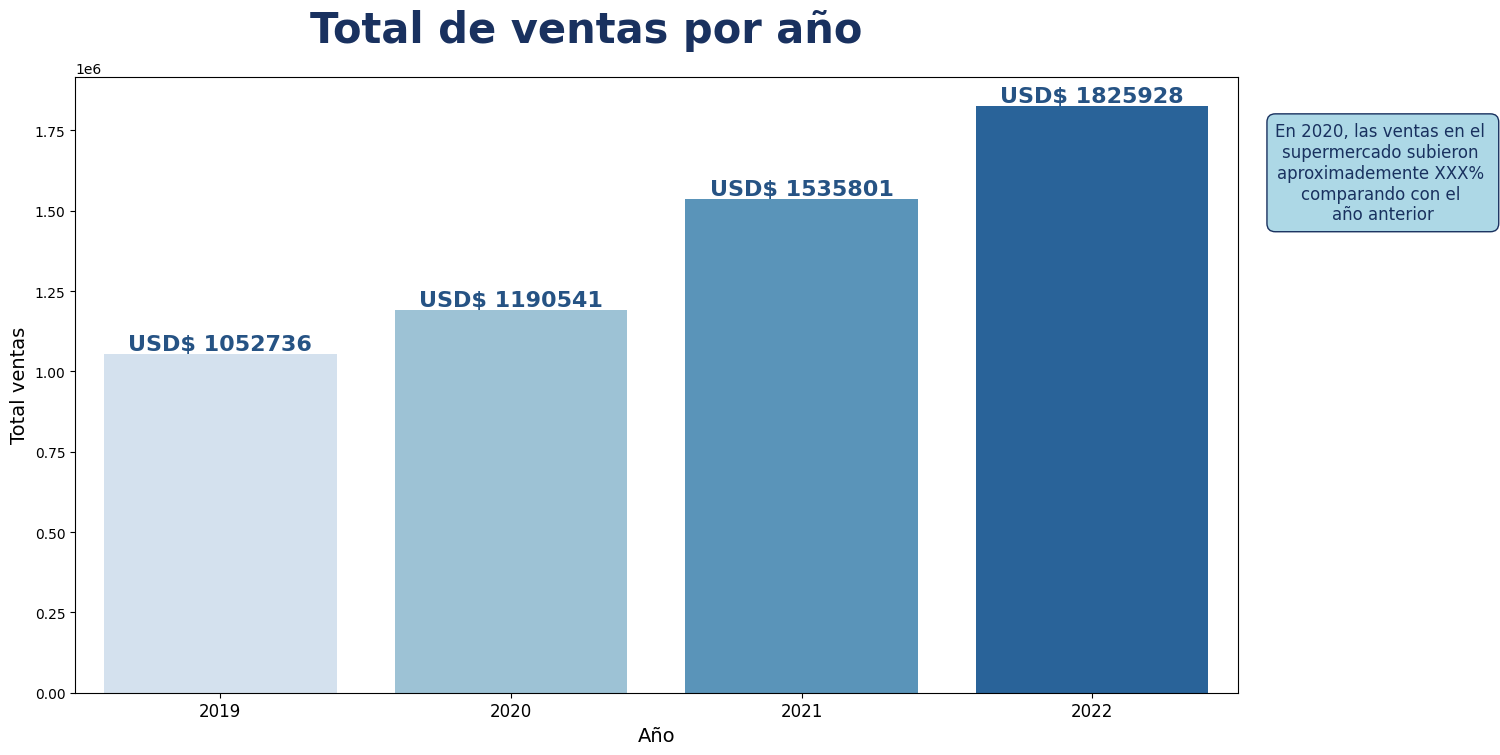

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 10 países más frecuentes
df = ventas_por_año

# Configuración de la gráfica
plt.figure(figsize=(15, 8))
plt.title('Total de ventas por año', fontsize=30, color='#19315F', pad=25,fontweight='bold',x=0.44)

# Generar paleta de colores
color_palette = sns.color_palette("Blues", n_colors=len(df))
# color_palette = sns.color_palette("Blues_r", n_colors=len(df))
sns.barplot(x=df.index, y=df.total_venta, palette=color_palette)

# Añadir anotaciones en las barras
for i, v in enumerate(df.values):
    plt.text(i, v, f'USD$ {v[0]:.0f}', ha='center', va='bottom', fontsize=16, fontweight='bold', color='#265384')

insight= f'En 2020, las ventas en el \nsupermercado subieron \naproximademente XXX% \ncomparando con el \naño anterior'

# Agregar la anotación:
bbox_props = dict(boxstyle='round,pad=0.5', fc='lightblue', ec='#19315F', lw=1)
plt.text(4, df.max()*0.8, insight, ha='center', va='bottom', fontsize=12, color='#19315F', bbox=bbox_props)
# plt.text(0,.9, txt_00, ha='center', va='bottom', fontsize=12, color='#19315F', bbox=bbox_props)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total ventas', fontsize=14)

plt.xticks(fontsize=12)
plt.show()

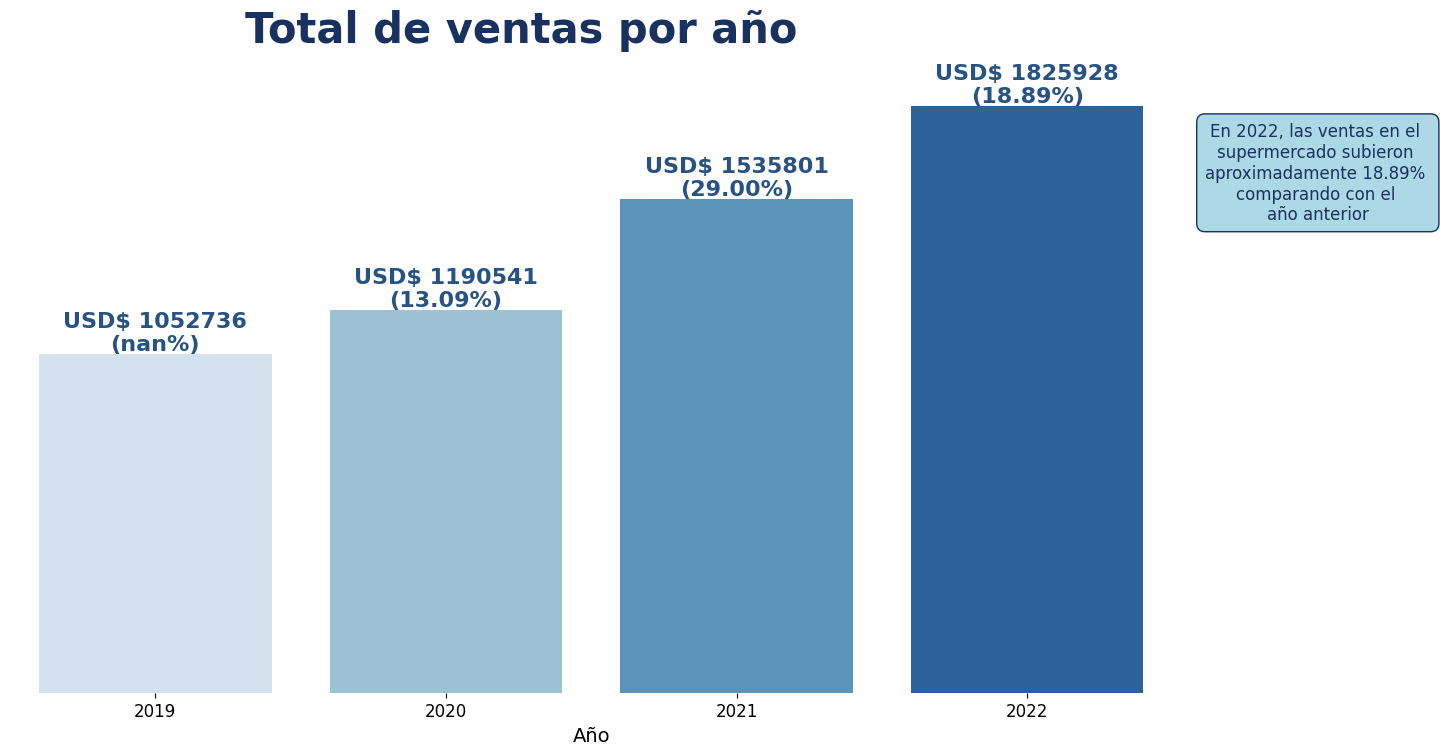

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 10 países más frecuentes
df = ventas_por_año

# Calcular el porcentaje de incremento entre barras consecutivas
df['incremento_porcentual'] = df['total_venta'].pct_change() * 100

# Configuración de la gráfica
plt.figure(figsize=(15, 8))
plt.title('Total de ventas por año', fontsize=30, color='#19315F', pad=25, fontweight='bold', x=0.44)

# Generar paleta de colores
color_palette = sns.color_palette("Blues", n_colors=len(df))
sns.barplot(x=df.index, y=df.total_venta, palette=color_palette)

# Añadir anotaciones en las barras con el porcentaje de incremento
for i, (valor, incremento) in enumerate(zip(df['total_venta'], df['incremento_porcentual'])):
    plt.text(i, valor, f'USD$ {valor:.0f}\n({incremento:.2f}%)', ha='center', va='bottom', fontsize=16, fontweight='bold', color='#265384')

insight = f'En 2022, las ventas en el \nsupermercado subieron \naproximadamente {df["incremento_porcentual"].iloc[3]:.2f}% \ncomparando con el \naño anterior'

# Agregar la anotación:
bbox_props = dict(boxstyle='round,pad=0.5', fc='lightblue', ec='#19315F', lw=1)
plt.text(4, df['total_venta'].max() * 0.8, insight, ha='center', va='bottom', fontsize=12, color='#19315F', bbox=bbox_props)

# Ocultar el marco
plt.box(False)

# Ocultar la leyenda
plt.legend().set_visible(False)

# Ocultar los valores del eje vertical
plt.yticks([])
plt.ylabel('')  # También puedes usar plt.ylabel(None) para ocultar completamente la etiqueta del eje y

plt.xlabel('Año', fontsize=14)
plt.xticks(fontsize=12)
plt.show()


In [31]:
ventas_por_año

total_venta  incremento_porcentual
año                                     
2019   1052735.86                    NaN
2020   1190541.40              13.090229
2021   1535801.44              29.000255
2022   1825927.50              18.890857

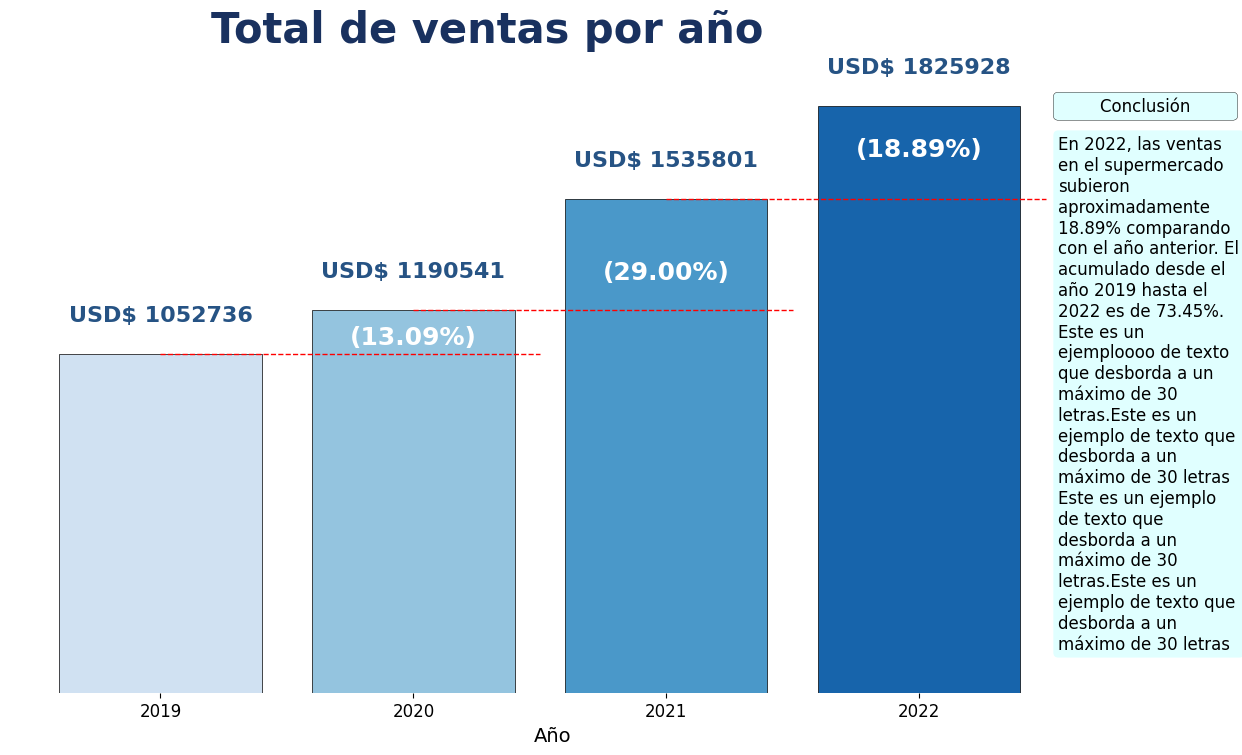

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Obtener los 10 países más frecuentes
df = ventas_por_año

# Calcular el porcentaje de incremento entre barras consecutivas
df['incremento_porcentual'] = df['total_venta'].pct_change() * 100
# Calcular el porcentaje de incremento entre el año 2019 y 2022:
incremento_total = (df['total_venta'].iloc[-1] - df['total_venta'].iloc[0]) * 100 / df['total_venta'].iloc[0]

# Configuración de la gráfica
plt.figure(figsize=(14, 8))
plt.title('Total de ventas por año', fontsize=30, color='#19315F', pad=25, fontweight='bold', x=0.44)

# Generar paleta de colores
color_palette = sns.color_palette("Blues", n_colors=len(df))

# Inicializar una lista para almacenar las líneas horizontales
lines = []

# Añadir líneas horizontales y anotaciones en las barras con el porcentaje de incremento
for i, (valor, incremento) in enumerate(zip(df['total_venta'], df['incremento_porcentual'])):
    bar = plt.bar(i, valor, color=color_palette[i], edgecolor='black',lw=0.5)  # Dibujar la barra
    plt.text(i, valor + 0.05 * max(df['total_venta']),f'USD$ {valor:.0f}', ha='center', va='bottom', fontsize=16, fontweight='bold', color='#265384')
    # plt.text(i, valor - 0.05 * max(df['total_venta']),f'USD$ {valor:.0f}\n\n({incremento:.2f}%)', ha='center', va='bottom', fontsize=16, fontweight='bold', color='#265384')
    plt.text(i, valor -(np.max(df['total_venta'])*incremento/200),f'({incremento:.2f}%)', ha='center', va='bottom', fontsize=18, fontweight='bold', color='white')

    # Agregar la línea horizontal
    if i < len(df) - 1:
        line = plt.hlines(y=valor, xmin=i, xmax=i + 1.5, color='red', linestyle='--', linewidth=1)
        lines.append(line)

# insight = f'En 2022, las ventas en el \nsupermercado subieron\naproximadamente {df["incremento_porcentual"].iloc[3]:.2f}% \ncomparando con el \naño anterior.\nEl acumulado desde el \naño 2019 hasta el 2022\n es de {incremento_total:.2f}%'
insight = f'En 2022, las ventas en el supermercado subieron aproximadamente {df["incremento_porcentual"].iloc[3]:.2f}% comparando con el año anterior. El acumulado desde el año 2019 hasta el 2022 es de {incremento_total:.2f}%. '

# Agregar la anotación:
bbox_props = dict(boxstyle='round,pad=0.5', fc='lightblue', ec='#19315F', lw=.8)
# plt.text(4, df['total_venta'].max() * 0.5, insight, ha='center', va='bottom', fontsize=12, color='#19315F', bbox=bbox_props)  # Controlar el ancho de la caja

# Ocultar el marco
plt.box(False)

# Ocultar la leyenda
plt.legend().set_visible(False)

# Ocultar los valores del eje vertical
plt.yticks([])
plt.ylabel('')  # También puedes usar plt.ylabel(None) para ocultar completamente la etiqueta del eje y

plt.xlabel('Año', fontsize=14)
plt.xticks(range(len(df)), df.index, fontsize=12)  # Mostrar etiquetas del eje x con los años

#Agregar insight:
insight_ventas_ano = "Este es un ejemploooo de texto que desborda a un máximo de 30 letras.Este es un ejemplo de texto que desborda a un máximo de 30 letras Este es un ejemplo de texto que desborda a un máximo de 30 letras.Este es un ejemplo de texto que desborda a un máximo de 30 letras"
plt.text(3.55,df['total_venta'].max()*1.015, '        Conclusión        ', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=.3), wrap=True)
plt.text(3.55,df['total_venta'].max()*.95, f'{insight} {insight_ventas_ano}', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=0), wrap=True)

plt.show()


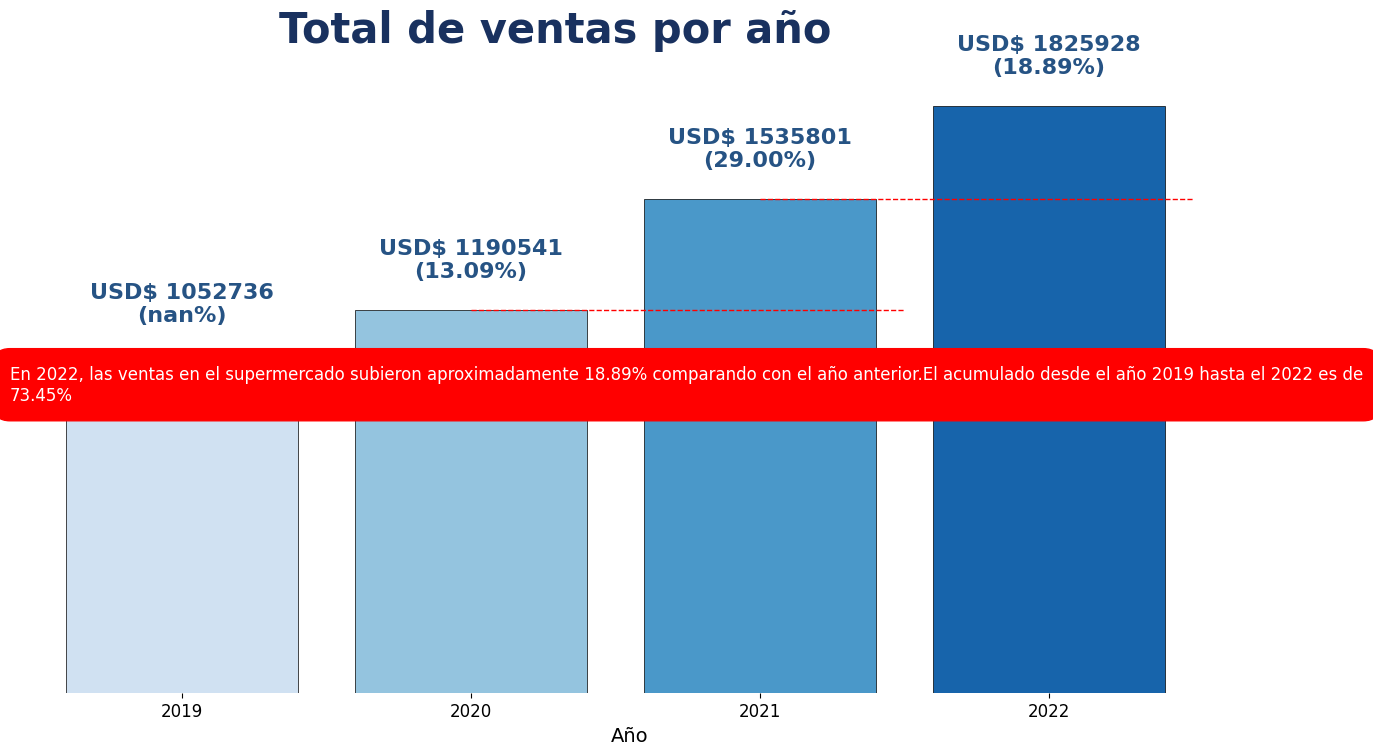

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 10 países más frecuentes
df = ventas_por_año

# Calcular el porcentaje de incremento entre barras consecutivas
df['incremento_porcentual'] = df['total_venta'].pct_change() * 100
# Calcular el porcentaje de incremento entre el año 2019 y 2022:
incremento_total = (df['total_venta'].iloc[-1] - df['total_venta'].iloc[0]) * 100 / df['total_venta'].iloc[0]

# Configuración de la gráfica
plt.figure(figsize=(16, 8))
plt.title('Total de ventas por año', fontsize=30, color='#19315F', pad=25, fontweight='bold', x=0.44)

# Generar paleta de colores
color_palette = sns.color_palette("Blues", n_colors=len(df))

# Inicializar una lista para almacenar las líneas horizontales
lines = []

# Añadir líneas horizontales y anotaciones en las barras con el porcentaje de incremento
for i, (valor, incremento) in enumerate(zip(df['total_venta'], df['incremento_porcentual'])):
    bar = plt.bar(i, valor, color=color_palette[i], edgecolor='black', lw=0.5)  # Dibujar la barra
    plt.text(i, valor + 0.05 * max(df['total_venta']), f'USD$ {valor:.0f}\n({incremento:.2f}%)', ha='center', va='bottom', fontsize=16, fontweight='bold', color='#265384')

    # Agregar la línea horizontal
    if i < len(df) - 1:
        line = plt.hlines(y=valor, xmin=i, xmax=i + 1.5, color='red', linestyle='--', linewidth=1)
        lines.append(line)

insight = f'En 2022, las ventas en el \nsupermercado subieron\naproximadamente {df["incremento_porcentual"].iloc[3]:.2f}% \ncomparando con el \naño anterior.\nEl acumulado desde el \naño 2019 hasta el 2022\n es de {incremento_total:.2f}%'

# Agregar la anotación:
bbox_props = dict(boxstyle='round,pad=0.5', fc='lightblue', ec='#19315F', lw=.5)
# plt.text(4, df['total_venta'].max() * 0.5, insight, ha='center', va='bottom', fontsize=12, color='#19315F', bbox=bbox_props)  # Controlar el ancho de la caja

# Agregar un cuadro de texto resaltando los porcentajes
insight_text=f'En 2022, las ventas en el supermercado subieron aproximadamente {df["incremento_porcentual"].iloc[3]:.2f}% comparando con el año anterior.El acumulado desde el año 2019 hasta el 2022 es de {incremento_total:.2f}%'
width = 0.5
text_box = plt.text(0, 0.5, insight_text,wrap=True, transform=plt.gca().transAxes, ha='left', va='center', fontsize=12, color='white', bbox=dict(facecolor='red', edgecolor='red', boxstyle='round,pad=1'))
# text_box = plt.text(0, 0.5, insight_text, wrap=True, transform=plt.gca().transAxes, ha='left', va='center', fontsize=12, color='white', bbox=dict(facecolor='red', edgecolor='red', width='width'))

# Ocultar el marco
plt.box(False)

# Ocultar la leyenda
plt.legend().set_visible(False)

# Ocultar los valores del eje vertical
plt.yticks([])
plt.ylabel('')  # También puedes usar plt.ylabel(None) para ocultar completamente la etiqueta del eje y

plt.xlabel('Año', fontsize=14)
plt.xticks(range(len(df)), df.index, fontsize=12)  # Mostrar etiquetas del eje x con los años
insight_text=f'En 2022, las ventas en el supermercado subieron aproximadamente {df["incremento_porcentual"].iloc[3]:.2f}% comparando con el año anterior.El acumulado desde el año 2019 hasta el 2022 es de {incremento_total:.2f}%'
# plt.figtext(0, -0, insight_text, wrap=True, horizontalalignment='center', fontsize=12, color='gray')

# Quitar las líneas al lado de los ejes
# plt.yaxis.tick_left()
# ax.xaxis.tick_bottom()
# ax.xaxis.set_tick_params(width=0)
# ax.yaxis.set_tick_params(width=0)
plt.show()


##Pregunta 2
Crea una función pregunta_2(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe   df_top_ganancias y guarda unicamente las columnas 'tipo_producto' y 'total_ganancia'.

In [34]:
def pregunta_2():
  global df_ventas_año
  df_top_ganancias=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()
  return df_top_ganancias

In [35]:
df_top_ganancias=pregunta_2()
df_top_ganancias.sample(5)

tipo_producto  total_ganancia
4813      Cámaras digitales           40.36
4544               Vestidos          172.48
4787       Bolsas de basura            9.96
6819  Limpiador de inodoros           71.28
177             Smartphones         1081.21

In [36]:
df_top_ganancias.shape

(7210, 2)

In [37]:
df_top_ganancias.tipo_producto.unique()

array(['Camisetas', 'Jeans', 'Toallitas desinfectantes',
       'Papel higiénico', 'Vestidos', 'Limpiador de inodoros',
       'Cámaras digitales', 'Lámparas LED', 'Ambientador en spray',
       'Zapatillas', 'Smartphones', 'Limpiacristales', 'Bolsas de basura',
       'Cepillos de baño', 'Detergente para platos',
       'Detergente para ropas', 'Laptops'], dtype=object)

Ahora, con los datos en df_top_ganancias, genera una agrupación por la columna tipo_producto y sumariza los valores de 'total_ganancia' y ordena el resultado en orden descendiente por esta última columna, para esto necesitarás usar los métodos groupby, aggregate y sort_values respectivamente, guarda este resultado en df_top_ganancias.

In [38]:
df_top_ganancias=df_top_ganancias.groupby('tipo_producto')['total_ganancia'].sum()
df_top_ganancias=pd.DataFrame(df_top_ganancias)
df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)

df_top_ganancias.head(7)

total_ganancia
tipo_producto                        
Lámparas LED                111453.41
Laptops                      91148.67
Cámaras digitales            80192.63
Smartphones                  64705.58
Jeans                        55982.95
Detergente para ropas        55766.39
Bolsas de basura             53328.46

Por último, selecciona y guarda en df_top_ganancias únicamente los primeros 7 registros.

In [39]:
df_top_ganancias=df_top_ganancias[:7]
df_top_ganancias.sort_values(by='total_ganancia', ascending=True, inplace=True)

df_top_ganancias.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_top_ganancias.txt', sep='\t')

df_top_ganancias

total_ganancia
tipo_producto                        
Bolsas de basura             53328.46
Detergente para ropas        55766.39
Jeans                        55982.95
Smartphones                  64705.58
Cámaras digitales            80192.63
Laptops                      91148.67
Lámparas LED                111453.41

###2. Visualización:

Crea una figura y un eje con la siguiente configuración:fig, ax = plt.subplots(figsize=(10,4))

Para crear el gráfico de barras horizontal puedes usar lo siguiente:ax.barh(ejeX, ejeY, color=colores, align='center')

In [40]:
import pandas as pd

# Supongamos que tienes un DataFrame df_ventas_limpio con las columnas 'departamento_producto' y 'tipo_producto'
# y una lista de tipos de productos que quieres verificar
tipos_producto_a_verificar = ['Bolsas de basura', 'Detergente para ropas', 'Jeans', 'Smartphones', 'Cámaras digitales', 'laptops', 'Lámparas LED']

# Verificar a qué departamento pertenecen los tipos de productos en la lista
departamentos_pertenecientes = df_ventas_limpio[df_ventas_limpio['tipo_producto'].isin(tipos_producto_a_verificar)]['departamento_producto'].unique()

# Imprimir los departamentos pertenecientes
print("Departamentos a los que pertenecen los tipos de productos:")
print(departamentos_pertenecientes)


Departamentos a los que pertenecen los tipos de productos:
['Ropa' 'Electrónicos' 'Productos de Limpieza']


In [41]:
producto_tipo=df_ventas_limpio['departamento_producto'].unique()
color1,color2,color3=list(producto_tipo)
color1

'Ropa'

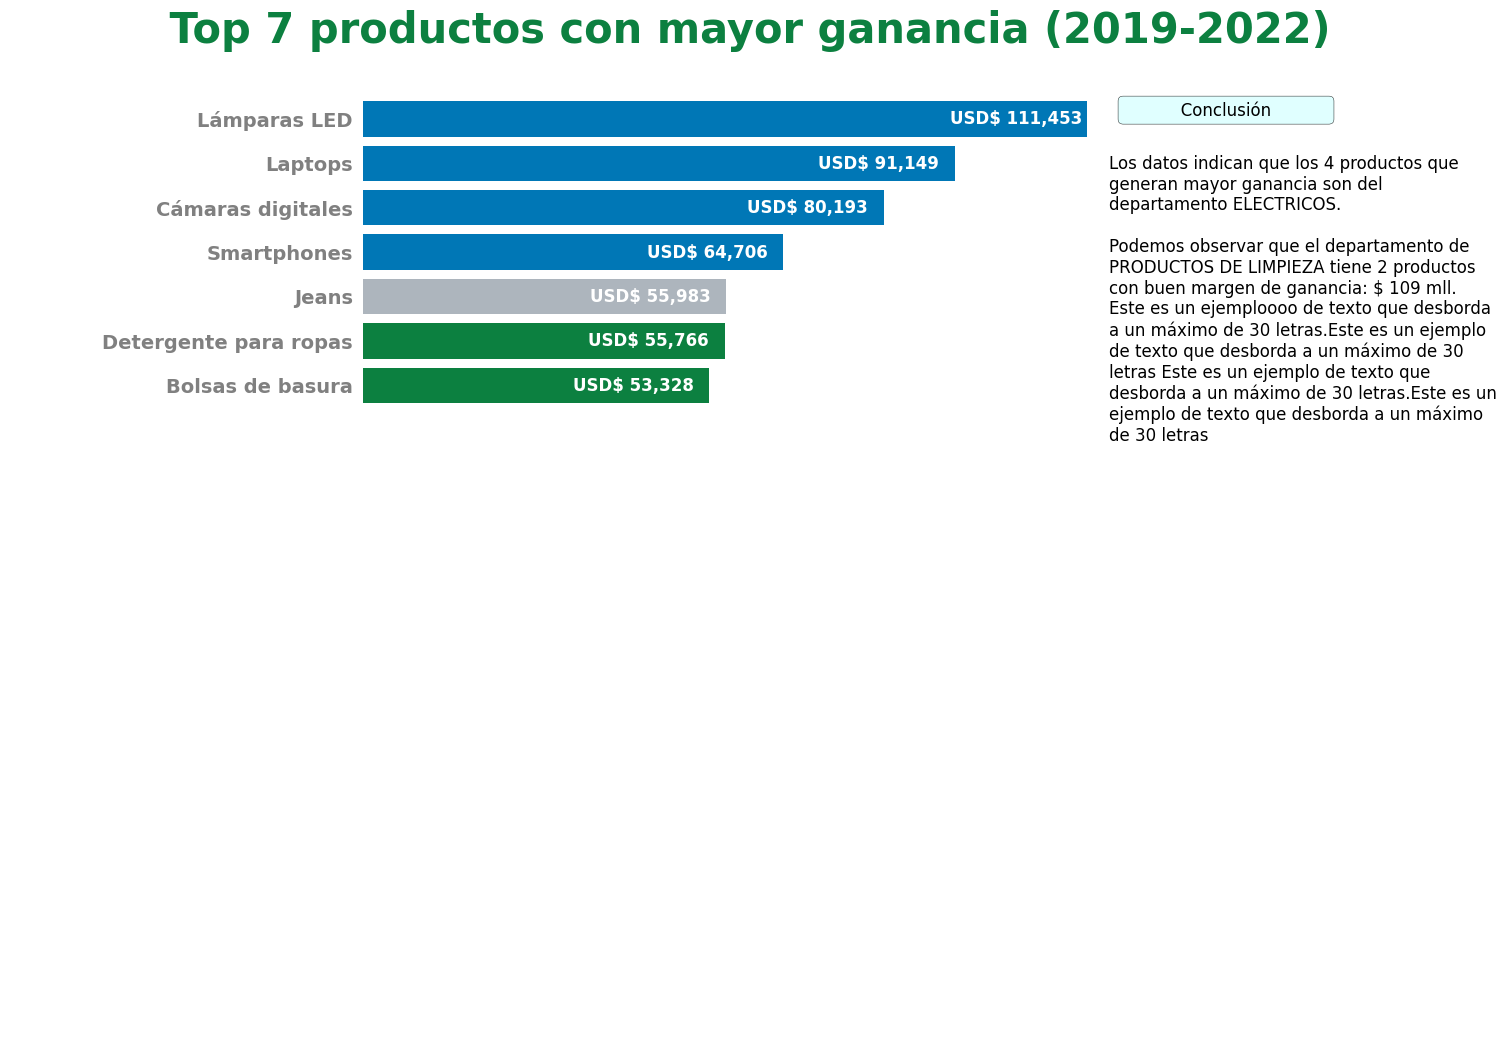

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 4))
# Configurar el estilo de la gráfica
# sns.set(style="whitegrid")
# colores=['#0C8040','#adb5bd','#0077b6']
colores=['#0C8040','#0C8040','#adb5bd','#0077b6','#0077b6','#0077b6','#0077b6']

# Generar la gráfica de barras horizontalesdf_top5_perdidas
ax.barh(y=df_top_ganancias.index, width=df_top_ganancias['total_ganancia'], color=colores, align='center', height=0.8)
# sns.barplot(x='total_ganancia', y=df_top_ganancias.index, data=df_top_ganancias, palette='Reds_r')

# Configurar los títulos de los ejes
ax.set_xlabel('total_ganancia', fontsize=14, fontweight='bold')
ax.set_ylabel('Empresas', fontsize=14, fontweight='bold')

# Invertir el eje x
# ax.invert_xaxis()

# Configurar el título y subtítulo de la gráfica
plt.title('           Top 7 productos con mayor ganancia (2019-2022)           ', fontsize=30, color='#0C8040', fontweight='bold', pad=40)
# plt.suptitle('Industria de Hoteles, Restaurantes y Ocio', fontsize=25, color='#b44c43',y=0.93,x=0.515)

# Mostrar los valores de las pérdidas al lado de las barras
# for i, (value, Codigo_pais) in enumerate(zip(df_top_ganancias.index, df_top_ganancias['total_ganancia'])):
    # ax.text(value, i, f' {value:.0f}', va='center_baseline', fontsize=12, color='#b44c43', fontweight='bold')
    # ax.text(-100, i, f' {Codigo_pais}', va='center', ha='left', fontsize=12, color='grey', fontweight='bold')

for i,valor in enumerate(df_top_ganancias['total_ganancia']):
  qtd =  f'USD$ {valor:,.0f}'
  ax.text(valor-21000,i,qtd, va='center', ha='left', fontsize=12, color='white', fontweight='bold')

ax.margins(x=0.07, y=0.01)
# plt.xticks(fontsize=12)
plt.xticks([])
plt.yticks(fontsize=14, fontweight='bold', color='gray')
plt.box(False)

# Ocultar la leyenda
# plt.legend().set_visible(False)

# Ocultar los valores del eje vertical
# plt.yticks([])
plt.ylabel('')
plt.xlabel('')
# Quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

#Texto insight:
insight='Los datos indican que los 4 productos que generan mayor ganancia son del departamento ELECTRICOS.\n\nPodemos observar que el departamento de PRODUCTOS DE LIMPIEZA tiene 2 productos con buen margen de ganancia: $ 109 mll. '
insight_ventas_mayor_ganancias = "Este es un ejemploooo de texto que desborda a un máximo de 30 letras.Este es un ejemplo de texto que desborda a un máximo de 30 letras Este es un ejemplo de texto que desborda a un máximo de 30 letras.Este es un ejemplo de texto que desborda a un máximo de 30 letras"
plt.text(max(df_top_ganancias['total_ganancia'])*1.05,6.4, '           Conclusión           ', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=.3), wrap=True)
plt.text(max(df_top_ganancias['total_ganancia'])*1.03,5.2, f'{insight} {insight_ventas_mayor_ganancias}', ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', pad=.3, boxstyle='round', linewidth=0), wrap=True)


plt.show()

##Pregunta 3

Crea una función pregunta_3(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe   df_ventas_año_region y guarda unicamente las columnas 'fecha_pedido','region' y 'total_venta'.

In [43]:
def pregunta_3():
  global df_ventas_año_region
  df_ventas_año_region=df_ventas_limpio[['fecha_pedido','region', 'total_venta']].copy()
  return df_ventas_año_region
pregunta_3()

fecha_pedido   region  total_venta
0      2021-11-09  Sureste       890.66
1      2021-11-09  Sureste      2488.59
2      2021-06-13  Sureste        49.72
3      2020-10-12      Sur        76.04
4      2019-06-10  Sureste       166.11
...           ...      ...          ...
7205   2021-09-30  Sureste       123.22
7206   2022-11-18  Noreste       271.97
7207   2022-11-18  Noreste       700.75
7208   2019-01-22  Noreste        85.83
7209   2022-05-05  Noreste       826.74

[7210 rows x 3 columns]

Crea una nueva columna en df_ventas_año_region llamada año y almacena sólo el año de la columna fecha_pedido, puedes usar el siguiente método fecha_pedido.dt.year, luego de realizar esto, elimina la columna fecha_pedido de df_ventas_año_region.

In [44]:
#Creando columna año con el valor del año de la columna 'fecha_pedido'
df_ventas_año_region['año']=df_ventas_año_region.fecha_pedido.dt.year
df_ventas_año_region

fecha_pedido   region  total_venta   año
0      2021-11-09  Sureste       890.66  2021
1      2021-11-09  Sureste      2488.59  2021
2      2021-06-13  Sureste        49.72  2021
3      2020-10-12      Sur        76.04  2020
4      2019-06-10  Sureste       166.11  2019
...           ...      ...          ...   ...
7205   2021-09-30  Sureste       123.22  2021
7206   2022-11-18  Noreste       271.97  2022
7207   2022-11-18  Noreste       700.75  2022
7208   2019-01-22  Noreste        85.83  2019
7209   2022-05-05  Noreste       826.74  2022

[7210 rows x 4 columns]

In [45]:
#Eliminando columna 'fecha_pedido'
df_ventas_año_region.drop('fecha_pedido',axis=1,inplace=True)
df_ventas_año_region

region  total_venta   año
0     Sureste       890.66  2021
1     Sureste      2488.59  2021
2     Sureste        49.72  2021
3         Sur        76.04  2020
4     Sureste       166.11  2019
...       ...          ...   ...
7205  Sureste       123.22  2021
7206  Noreste       271.97  2022
7207  Noreste       700.75  2022
7208  Noreste        85.83  2019
7209  Noreste       826.74  2022

[7210 rows x 3 columns]

Por último, genera una tabla cruzada con el método pd.crosstab:

In [46]:
df_ventas_año_region=pd.crosstab(index = df_ventas_año_region.año, columns = df_ventas_año_region.region, values = df_ventas_año_region.total_venta, aggfunc="sum")
df_ventas_año_region.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_ventas_año_region.txt', sep='\t')

df_ventas_año_region

region  Centro-Oeste    Noreste      Norte        Sur    Sureste
año                                                             
2019        67406.37  346407.40   71778.74   44189.84  522953.51
2020        90616.80  282431.39  107309.38   61451.04  648732.79
2021       125344.52  359829.92   69534.02  110198.47  870894.51
2022        97679.64  549254.20   99195.86   99393.36  980404.44

In [47]:
df_t=df_ventas_año_region.T
df_t

año                2019       2020       2021       2022
region                                                  
Centro-Oeste   67406.37   90616.80  125344.52   97679.64
Noreste       346407.40  282431.39  359829.92  549254.20
Norte          71778.74  107309.38   69534.02   99195.86
Sur            44189.84   61451.04  110198.47   99393.36
Sureste       522953.51  648732.79  870894.51  980404.44

In [48]:
df_ventas_año_region.columns

Index(['Centro-Oeste', 'Noreste', 'Norte', 'Sur', 'Sureste'], dtype='object', name='region')

In [49]:
#rdenandon df:
df_ventas_año_region=df_ventas_año_region[[ 'Sureste', 'Noreste','Centro-Oeste', 'Norte', 'Sur']]

###2. Visualización:

Para crear el gráfico de columnas apiladas puedes usar lo siguiente:

In [50]:
# lista=[]
# for container in ax.containers:
#   labels = [valor for valor in container]
#   rectangle_obj = labels[0]

# # Acceder al valor de height
#   height_value = rectangle_obj.get_height()
#   lista.append(int((height_value)/1000))
# print(lista)

###Obtener df con columnas de región y ventas totales

In [51]:
df=df_ventas_año_region.copy()
total_sales = df.sum(axis=0)# volumen de ventas totales por región

df_total_sales_00 = pd.DataFrame({
    'Region': total_sales.index,
    'Total_ventas': total_sales.values
})
df_total_sales_00 = df_total_sales_00.sort_values(by='Total_ventas',ascending=True)
df_total_sales_00['porcentajes_respecto_total']=df_total_sales_00['Total_ventas']/sum(df_total_sales_00['Total_ventas'])

###guardar df
df_total_sales_00.to_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_total_sales_porcentajes.txt', sep='\t',index=False)

df_total_sales_00


Region  Total_ventas  porcentajes_respecto_total
4           Sur     315232.71                    0.056241
3         Norte     347818.00                    0.062055
2  Centro-Oeste     381047.33                    0.067983
1       Noreste    1537922.91                    0.274384
0       Sureste    3022985.25                    0.539337

In [52]:
###   PREPARAR TEXTO PARA CONSULTAR IA:   ####

import json
txt = pd.read_csv('/content/drive/MyDrive/Supermarket_Sales_Analysis/df_total_sales_porcentajes.txt', sep='\t', index_col=False)
txt.reset_index(drop=True, inplace=True) ##sin el índice

lista_datos={'Hacer':'Analiza los porcentajes'}
lista = txt.to_dict(orient='records') # Convertir DataFrame a lista de diccionarios

frase = 'Analiza los porcentajes:'
lista.insert(0, frase) # Agregar la frase al principio de la lista de datos

texto_plano = json.dumps(lista) # Convertir la lista a formato de texto plano (JSON)

texto_plano[1:-1]

'"Analiza los porcentajes:", {"Region": "Sur", "Total_ventas": 315232.71, "porcentajes_respecto_total": 0.0562412776635287}, {"Region": "Norte", "Total_ventas": 347818.0, "porcentajes_respecto_total": 0.0620548822943318}, {"Region": "Centro-Oeste", "Total_ventas": 381047.33, "porcentajes_respecto_total": 0.0679833913475421}, {"Region": "Noreste", "Total_ventas": 1537922.91, "porcentajes_respecto_total": 0.2743838017520836}, {"Region": "Sureste", "Total_ventas": 3022985.25, "porcentajes_respecto_total": 0.5393366469425136}'

###Obtener los valores de porcentajes que superen el 10%

In [53]:
my_list = []
for region, (nombre, porc) in enumerate(zip(df_total_sales_00['Region'], df_total_sales_00['porcentajes_respecto_total'])):
    if porc > 0.1: ###condición: mayores al 10%
        my_list.append((nombre, porc))

df_porc_mayor=pd.DataFrame(my_list, columns=['Region', 'Porcentaje'])
df_porc_mayor


Region  Porcentaje
0  Noreste    0.274384
1  Sureste    0.539337

In [54]:
### otra forma de mostrar los valores mayores (se prefija n=2 por ejempllo)
n_mayores = 2  # El número de mayores valores que deseas obtener
mayores_valores = df_total_sales_00.nlargest(n_mayores, 'Total_ventas')
mayores_valores

Region  Total_ventas  porcentajes_respecto_total
0  Sureste    3022985.25                    0.539337
1  Noreste    1537922.91                    0.274384

In [55]:
porc_acumulado_ventas_region=(mayores_valores['porcentajes_respecto_total'].sum()).round(4)
porc_acumulado_ventas_region

0.8137

In [56]:
df_ventas_año_region

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019    522953.51  346407.40      67406.37   71778.74   44189.84
2020    648732.79  282431.39      90616.80  107309.38   61451.04
2021    870894.51  359829.92     125344.52   69534.02  110198.47
2022    980404.44  549254.20      97679.64   99195.86   99393.36

In [57]:
df

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019    522953.51  346407.40      67406.37   71778.74   44189.84
2020    648732.79  282431.39      90616.80  107309.38   61451.04
2021    870894.51  359829.92     125344.52   69534.02  110198.47
2022    980404.44  549254.20      97679.64   99195.86   99393.36

In [58]:
# Sumar los valores de la fila correspondiente al año 2022
x_insight_title = df_ventas_año_region.loc[2022].sum()
x_insight_title

1825927.5

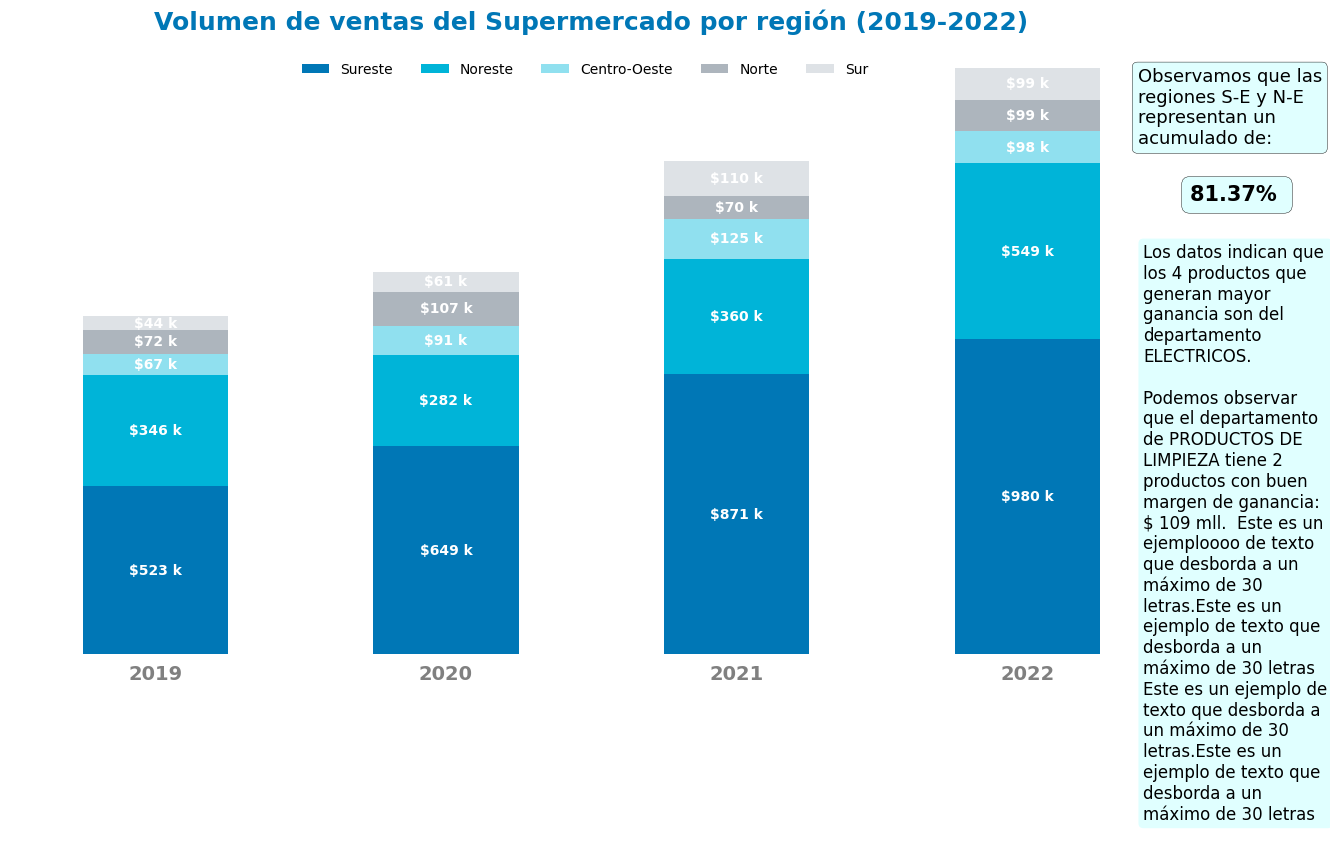

In [59]:
df=df_ventas_año_region.copy()
df=round(df/1000)
colores=['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
ax = df.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='$%0.0f k', fontsize=10, color='white',fontweight='bold')

plt.title('Volumen de ventas del Supermercado por región (2019-2022)',fontsize=18,fontweight='bold',color='#0077b6')

#Agregar insight:
x_insight_title = df_ventas_año_region.loc[2022].sum()
insight_ventas_ano = "Este es un ejemploooo de texto que desborda a un máximo de 30 letras.Este es un ejemplo de texto que desborda a un máximo de 30 letras Este es un ejemplo de texto que desborda a un máximo de 30 letras.Este es un ejemplo de texto que desborda a un máximo de 30 letras"
plt.text(3.38,x_insight_title/1000, 'Observamos que las regiones S-E y N-E representan un acumulado de:', ha='left', va='top', fontsize=13, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=.3), wrap=True)
plt.text(3.56,x_insight_title*.8/1000, f'{porc_acumulado_ventas_region:.2%} ', ha='left', va='top', fontsize=15, fontweight='bold', bbox=dict(facecolor='lightcyan', pad=.4, boxstyle='round', linewidth=.3), wrap=True)
plt.text(3.4,x_insight_title*.7/1000, f'{insight} {insight_ventas_ano}', ha='left', va='top', fontsize=12, bbox=dict(facecolor='lightcyan', pad=.3, boxstyle='round', linewidth=0), wrap=True)

# Ocultar los valores del eje vertical
plt.box(False) # Ocultar el marco
plt.yticks([])
plt.ylabel('')

plt.xlabel('')
plt.xticks(fontsize=14,rotation=0, fontweight='bold', color='grey')
# plt.legend(title='',frameon=False,fontsize=10, loc='upper center')
legend_x = 0.24  # Ajusta la coordenada x de la leyenda
legend_y = 0.95  # Ajusta la coordenada y de la leyenda
ax.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=10, ncol=len(df.columns))
# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.show()


In [60]:
df_ventas_año_region

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019    522953.51  346407.40      67406.37   71778.74   44189.84
2020    648732.79  282431.39      90616.80  107309.38   61451.04
2021    870894.51  359829.92     125344.52   69534.02  110198.47
2022    980404.44  549254.20      97679.64   99195.86   99393.36

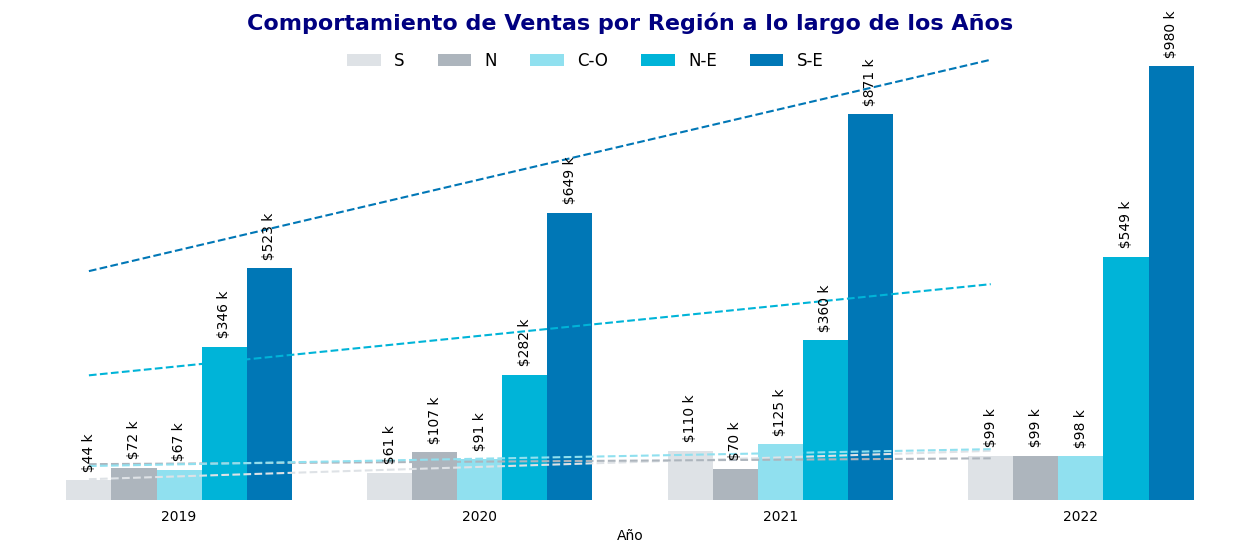

In [61]:
df=df_ventas_año_region.copy()
df=df[['Sur','Norte','Centro-Oeste','Noreste','Sureste']]
# df = df.sort_values(by='Sureste', ascending=False)
df=round(df/1000)

# Colores para la gráfica de barras
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6'][::-1]
labels = ['S-E', 'N-E', 'C-O', 'N', 'S'][::-1]

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(16, 6))

# Configurar la posición de las barras
bar_width = 0.15
bar_positions = np.arange(len(df.index))

# Crear barras para cada región
for i, (region, color) in enumerate(zip(df.columns, colores)):
    ax.bar(bar_positions + i * bar_width, df[region], width=bar_width, label=labels[i], color=color)
    # Ajustar una línea de tendencia lineal y trazarla
    trend_line = np.polyfit(bar_positions, df[region], 1)
    ax.plot(bar_positions, np.polyval(trend_line, bar_positions), color=color, linestyle='dashed')


for container in ax.containers:
    ax.bar_label(container, label_type='edge',fmt='  $%0.0f k', fontsize=10, color='black',rotation=90)
    # ax.bar_label(container, label_type='edge', fmt='$%0.0f k', fontsize=12, color='black',fontweight='bold',rotation=90)

# Configurar el eje x
ax.set_xticks(bar_positions + (len(df.columns) - 1) * bar_width / 2)
ax.set_xticklabels(df.index)

# Configurar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_yticks([])
ax.set_title('Comportamiento de Ventas por Región a lo largo de los Años',color='navy',fontweight='bold',fontsize=16)
legend_x = 0.26  # Ajusta la coordenada x de la leyenda
legend_y = 0.95  # Ajusta la coordenada y de la leyenda
ax.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=12, ncol=len(df.columns))

# Configuración adicional para quitar las líneas al lado de los ejes
plt.box(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

plt.show()


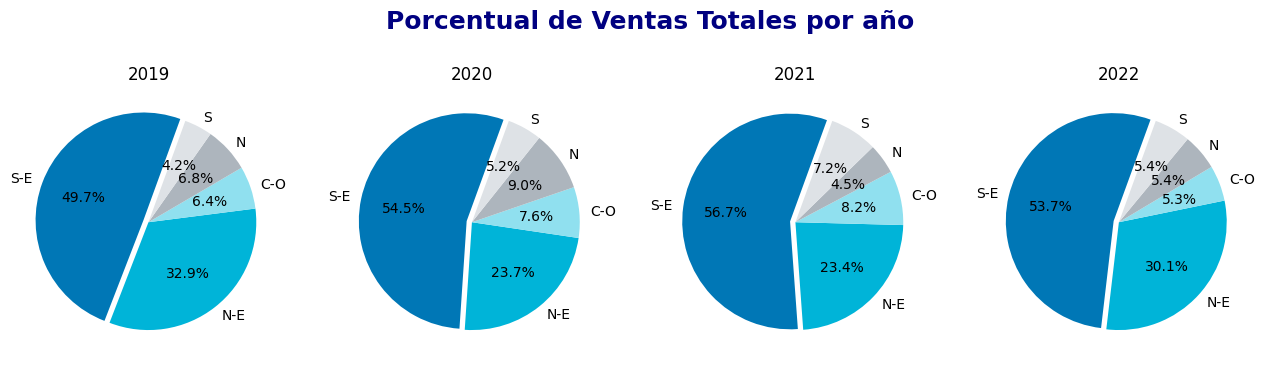

In [62]:
df=df_ventas_año_region.copy()

# Colores para la gráfica de torta
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
labels = [ 'S-E', 'N-E','C-O', 'N', 'S']

# Configuración de la gráfica
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

for i, año in enumerate(df.index):
    # ax1 = axs[0, i % 4]
    ax1 = axs[i]
    # ax1.pie(df.loc[año], labels=labels, autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops=dict(width=0.3))
    explode = (0.05, 0, 0, 0, 0)  # Separar la primera porción (Sureste)

    ax1.pie(df.loc[año], labels=labels, autopct='%1.1f%%', startangle=70, colors=colores, explode=explode)

    ax1.set_title(f'{año}')

# Título
plt.text(-6.8,1.8,'Porcentual de Ventas Totales por año', fontsize=18,fontweight='bold', color='navy',ha='left')
plt.show()

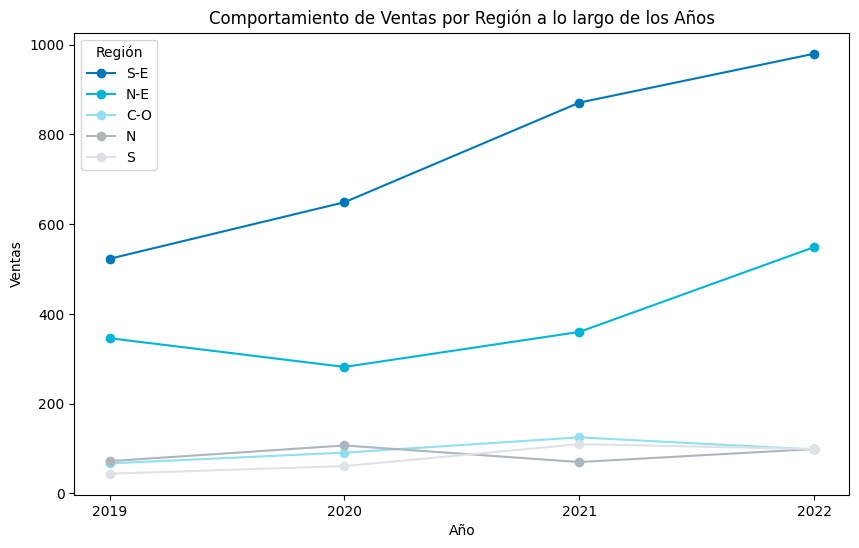

In [63]:
df=df_ventas_año_region.copy()
df=round(df/1000)

# Colores para la gráfica de líneas
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
labels = ['S-E', 'N-E', 'C-O', 'N', 'S']

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar la posición de las líneas
line_positions = np.arange(len(df.index))

# Crear líneas con marcas de puntos para cada región
for i, (region, color) in enumerate(zip(df.columns, colores)):
    ax.plot(line_positions, df[region], marker='o', label=labels[i], color=color)

# Configurar el eje x
ax.set_xticks(line_positions)
ax.set_xticklabels(df.index)

# Configurar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Ventas')
ax.set_title('Comportamiento de Ventas por Región a lo largo de los Años')
ax.legend(title='Región')

# Mostrar la gráfica
plt.show()


In [64]:
df_ventas_año_region

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019    522953.51  346407.40      67406.37   71778.74   44189.84
2020    648732.79  282431.39      90616.80  107309.38   61451.04
2021    870894.51  359829.92     125344.52   69534.02  110198.47
2022    980404.44  549254.20      97679.64   99195.86   99393.36

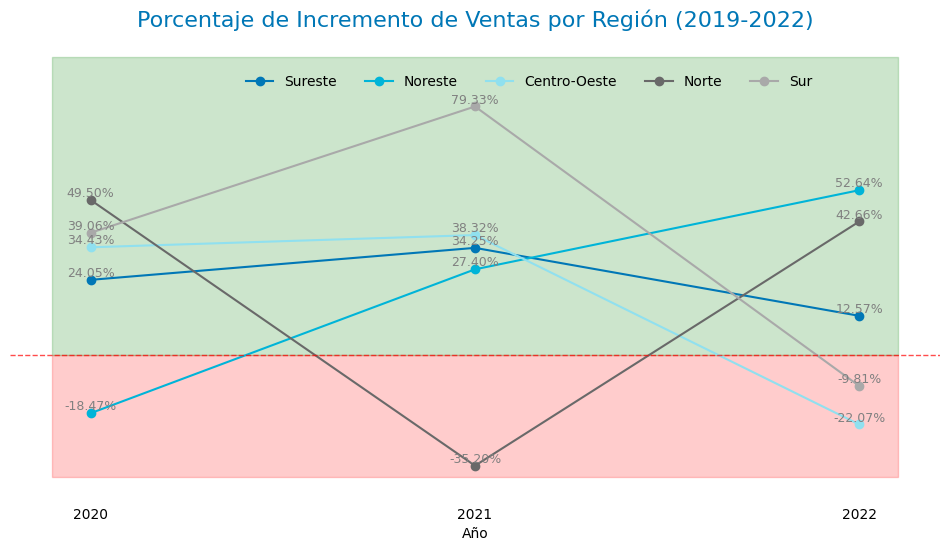

In [65]:
df = df_ventas_año_region.copy()

colores = ['#0077b6', '#00b4d8', '#90e0ef', 'dimgray', 'darkgray']

rango_años=[2019.9, 2022.1]

# Calcular el porcentaje de incremento para cada región
df_porcentaje_incremento = df.pct_change() * 100

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el porcentaje de incremento
for i, col in enumerate(df_porcentaje_incremento.columns):
    ax.plot(df_porcentaje_incremento.index, df_porcentaje_incremento[col], marker='o', color=colores[i], label=col)

    # Agregar etiquetas de datos en cada punto del gráfico
    for x, y in zip(df_porcentaje_incremento.index, df_porcentaje_incremento[col]):
        ax.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=9, color='gray')

# Agregar línea en el punto cero
ax.axhline(0, color='red', linestyle='--', linewidth=1,alpha=.7)

# Rellenar el área debajo de la línea cero con color transparente rojo
ax.fill_between(rango_años, 0, (df_porcentaje_incremento.min().min())*1.1, color='red', alpha=0.2)
ax.fill_between(rango_años, 0, (df_porcentaje_incremento.max().max())*1.2, color='green', alpha=0.2)

# Configuración adicional
plt.title('Porcentaje de Incremento de Ventas por Región (2019-2022)', color='#0077b6',fontsize=16)
plt.xlabel('Año')
plt.xticks(df.index[1:])
# plt.ylabel('Porcentaje de Incremento')
plt.grid(False)
# plt.legend(title='', loc='upper right',frameon=False,fontsize=8)
legend_x = 0.24  # Ajusta la coordenada x de la leyenda
legend_y = 0.9  # Ajusta la coordenada y de la leyenda
ax.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=10, ncol=len(df.columns))
plt.box(False)
plt.ylabel('')
plt.yticks([])
# plt.yticks(fontweight='bold',color='gray', fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())###agregar % al eje y

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.show()


In [66]:
df_ventas_año_region

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019    522953.51  346407.40      67406.37   71778.74   44189.84
2020    648732.79  282431.39      90616.80  107309.38   61451.04
2021    870894.51  359829.92     125344.52   69534.02  110198.47
2022    980404.44  549254.20      97679.64   99195.86   99393.36

In [67]:
df_porcentaje_incremento

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019          NaN        NaN           NaN        NaN        NaN
2020    24.051714 -18.468431     34.433585  49.500228  39.061468
2021    34.245490  27.404365     38.323710 -35.202291  79.327266
2022    12.574420  52.642726    -22.071073  42.658026  -9.805136

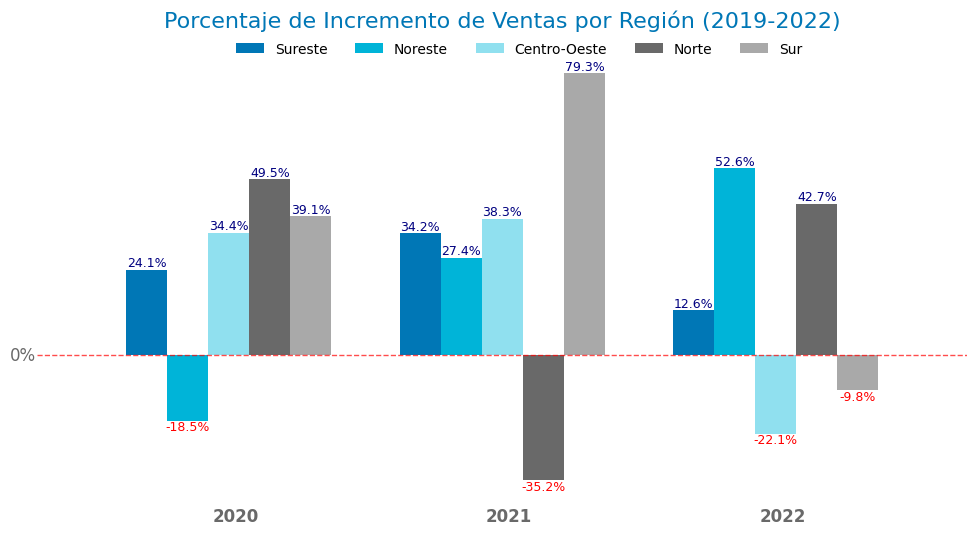

In [68]:
df=df_ventas_año_region.copy()
# region=['Sur','Norte','Centro-Oeste','Noreste','Sureste'][::-1]
# df=df[region]

colores = ['#0077b6', '#00b4d8', '#90e0ef', 'dimgray', 'darkgray']

rango_años=[2019.9, 2022.1]

# Calcular el porcentaje de incremento para cada región
df_porcentajes = df.pct_change() * 100
# Eliminar la fila correspondiente al año 2019
df_porcentaje_incremento = df_porcentajes
# df_porcentaje_incremento = df_porcentajes.drop(2019)


# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Definir la posición de las barras
# bar_positions = np.arange(len(df_porcentaje_incremento.columns))
# Ancho de las barras
# bar_width = 0.2

# Graficar barras paralelas
for i, col in enumerate(df_porcentaje_incremento.columns):
    ax.bar(bar_positions + i * bar_width, df_porcentaje_incremento[col],width=bar_width, color=colores[i], label=col)
    # Agregar etiquetas de datos en cada punto del gráfico
    for x, y in zip(bar_positions + i * bar_width, df_porcentaje_incremento[col]):
      if y>0:
        ax.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=9, color='navy')
      else:
        ax.text(x, y, f'{y:.1f}%', ha='center', va='top', fontsize=9, color='red')


# Agregar línea en el punto cero
ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
# Agregar etiqueta '0%' en el eje y
ax.text(0.5, 0, '0%', ha='left', va='center', fontsize=12, color='dimgray')
ax.set_yticks([])

# Configuración adicional
plt.title('Porcentaje de Incremento de Ventas por Región (2019-2022)', color='#0077b6', fontsize=16)
plt.xlabel('Región')
plt.ylabel('')
plt.legend(title='', loc='center left', bbox_to_anchor=(0.2, .97), frameon=False, fontsize=10, ncol=len(df.columns))
plt.box(False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

# Establecer las etiquetas del eje x
ax.set_xticks(bar_positions+0.1 + (len(df_porcentaje_incremento.index) - 1) * bar_width / 2)
ax.set_xticklabels(df_porcentaje_incremento.index,  ha='center', fontsize=12,fontweight='bold', color='dimgray')
ax.set_xlim(.6,4)
ax.set_ylim(-40,90)
ax.set_xlabel('')
plt.show()


###Crear nuevo dataframe con columnas de region y totales de ventas:

In [69]:
df=df_ventas_año_region.copy()
total_sales = df.sum(axis=0)# volumen de ventas totales por región

df_total_sales = pd.DataFrame({
    'Region': total_sales.index,
    'Total_ventas': total_sales.values
})
df_total_sales = df_total_sales.sort_values(by='Total_ventas',ascending=True)
df_total_sales


Region  Total_ventas
4           Sur     315232.71
3         Norte     347818.00
2  Centro-Oeste     381047.33
1       Noreste    1537922.91
0       Sureste    3022985.25

###Graficas tipo pie acumulado de ventas por región:

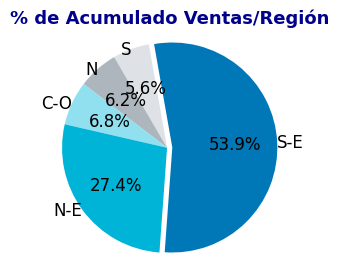

In [70]:
# Crear un gráfico de torta:
regiones = df_total_sales.Region
labels = [ 'S', 'N','C-O', 'N-E', 'S-E']
colores = ['#dee2e6', '#adb5bd', '#90e0ef', '#00b4d8', '#0077b6']
poblaciones = df_total_sales.Total_ventas

plt.figure(figsize=(3, 3))
explode = (0, 0, 0, 0, 0.05)
plt.pie(poblaciones, labels=labels, autopct='%1.1f%%', colors=colores, startangle=100, explode=explode,
        textprops={'fontsize': 12}, labeldistance=1)

plt.title('% de Acumulado Ventas/Región', fontsize=13, color='darkblue',fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo
plt.show()

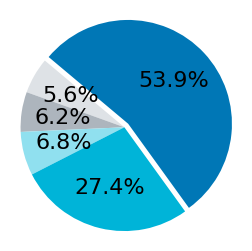

In [71]:
# Crear un gráfico de torta para insertar el grafica de barras:
regiones = df_total_sales.Region
labels = [ 'S', 'N','C-O', 'N-E', 'S-E']
colores = ['#dee2e6', '#adb5bd', '#90e0ef', '#00b4d8', '#0077b6']
poblaciones = df_total_sales.Total_ventas

plt.figure(figsize=(3, 3))
explode = (0, 0, 0, 0, 0.05)
plt.pie(poblaciones, autopct='%1.1f%%', colors=colores, startangle=140, explode=explode,
        textprops={'fontsize': 16})
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo

plt.savefig('/content/drive/MyDrive/Colab Notebooks/acumulado_total_ventas_brasil.png')# Guardo la imagen

plt.show()


###Graficas tipo barras acumulado de ventas por región:

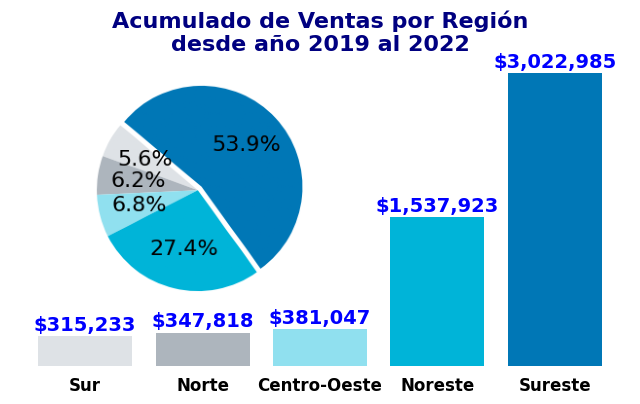

In [72]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6'][::-1]
labels = ['S-E', 'N-E', 'C-O', 'N', 'S']

fig, ax = plt.subplots(figsize=(8, 4))

bar_positions = np.arange(len(df_total_sales['Region']))# Configurar la posición de las barras
ax.bar(bar_positions, df_total_sales['Total_ventas'], color=colores)# Crear barras para cada región

# Configurar el eje x,y
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_total_sales['Region'], fontsize=12, fontweight='bold')
ax.set_yticks([])

# Configurar etiquetas y leyenda
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'Acumulado de Ventas por Región\ndesde año 2019 al 2022', color='navy', fontweight='bold', fontsize=16)

# Mostrar etiquetas en las barras
for i, value in enumerate(df_total_sales['Total_ventas']):
    ax.text(i, value + 20000, f'${value:,.0f}', ha='center', va='bottom', fontsize=14, color='blue', fontweight='bold')

# Configuración adicional para quitar las líneas al lado de los ejes
plt.box(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)


# Añadir la imagen graf pie (% cumulado)
img_acumulado='/content/drive/MyDrive/Colab Notebooks/acumulado_total_ventas_brasil.png'
img_ventas = OffsetImage(plt.imread(img_acumulado), zoom=.7)
ab_ventas = AnnotationBbox(img_ventas, (.3, 0.58), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0, zorder=-100)
ax.add_artist(ab_ventas)

# Guardar la imagen como PNG
plt.savefig('/content/drive/MyDrive/Colab Notebooks/distribucion_ventas_total_brasil.png')

plt.show()


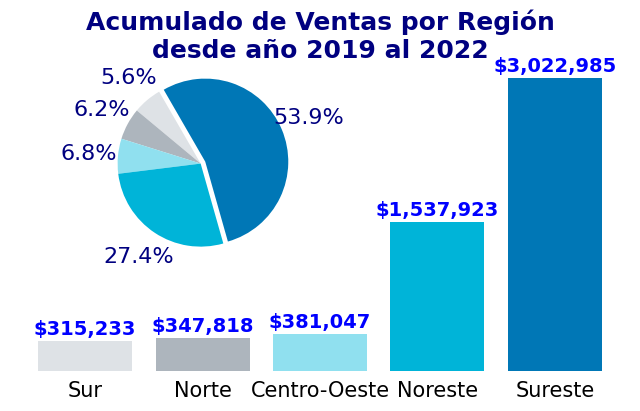

In [73]:
##3#   GRAFICA DE BARRAS CON GRAFICA PIE   ####

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Datos de la gráfica de barras
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6'][::-1]
labels = ['S-E', 'N-E', 'C-O', 'N', 'S']
bar_positions = np.arange(len(df_total_sales['Region']))
bar_heights = df_total_sales['Total_ventas']

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(bar_positions, bar_heights, color=colores)
plt.box(False)

# Configuraciones de la gráfica de barras
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_total_sales['Region'], fontsize=15)
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'Acumulado de Ventas por Región\ndesde año 2019 al 2022', color='navy', fontweight='bold', fontsize=18,pad=1)

# Mostrar etiquetas en las barras
for i, value in enumerate(bar_heights):
    ax.text(i, value + 20000, f'${value:,.0f}', ha='center', va='bottom', fontsize=14, color='blue', fontweight='bold')

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

#GRafica pie:
explode = (0, 0, 0, 0, 0.06)  # Separar la primera porción (Sureste)
axins = inset_axes(ax, width="60%", height="60%", loc='upper left', borderpad=0.5)
axins.pie(df_total_sales['Total_ventas'], autopct='%1.1f%%', colors=colores, startangle=120,
          textprops={'fontsize': 16,'color':'navy'}, labels=None, pctdistance=1.35, explode=explode)
axins.axis('equal')


# Guardar la imagen como PNG
plt.savefig('/content/drive/MyDrive/Colab Notebooks/distribucion_ventas_total_brasil_insertGraf.png')
plt.box(False)
plt.show()


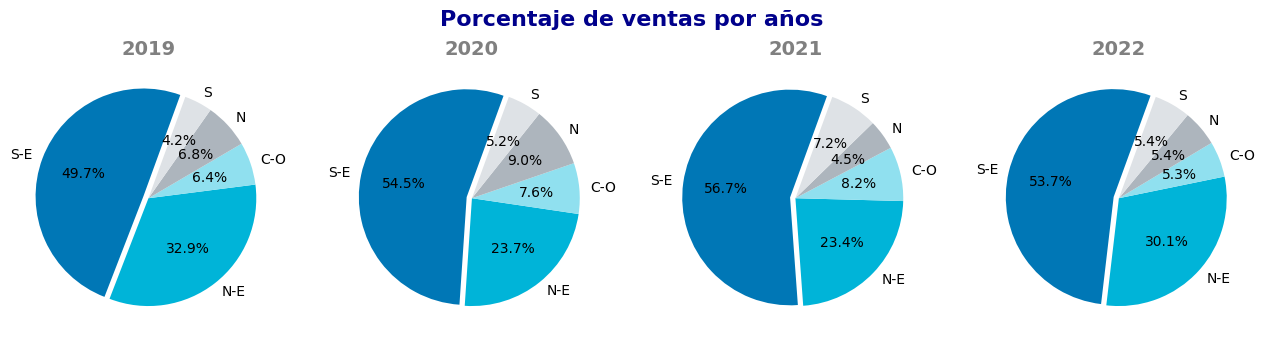

In [74]:
df=df_ventas_año_region.copy()

# Colores para la gráfica de torta
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
labels = [ 'S-E', 'N-E','C-O', 'N', 'S']

# Configuración de la gráfica
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

for i, año in enumerate(df.index):
    ax1 = axs[i]
    explode = (0.05, 0, 0, 0, 0)  # Separar la primera porción (Sureste)

    ax1.pie(df.loc[año], labels=labels, autopct='%1.1f%%', startangle=70, colors=colores, explode=explode)

    ax1.set_title(f'{año}',fontsize=14,color='gray',fontweight='bold')
plt.text(-6.3,1.6,'Porcentaje de ventas por años',fontsize=16, fontweight='bold',color= 'darkblue')
plt.show()

#INFO: Datos de población por región

#https://www.ibge.gov.br/estatisticas/sociais/populacao/22827-censo-demografico-2022.html?edicao=37225&t=resultados ####


In [75]:
### INFO: https://www.ibge.gov.br/estatisticas/sociais/populacao/22827-censo-demografico-2022.html?edicao=37225&t=resultados ####

import pandas as pd
# Datos proporcionados
regiones = ['Norte', 'Centro-Oeste', 'Nordeste', 'Sudeste', 'Sur']
poblaciones = [17355778,16289538, 54657621, 84840113, 29937706]

df_population = pd.DataFrame({'Region': regiones, 'Population': poblaciones})
df_population.to_csv('/content/drive/MyDrive/Colab Notebooks/poblacion_por_region_brasil_2022.csv', index=False)
df_population['Population_10k']=round(df_population['Population']/10000,0)
df_population['Population_mll']=round(df_population['Population']/1000000,0)
df_population

Region  Population  Population_10k  Population_mll
0         Norte    17355778          1736.0            17.0
1  Centro-Oeste    16289538          1629.0            16.0
2      Nordeste    54657621          5466.0            55.0
3       Sudeste    84840113          8484.0            85.0
4           Sur    29937706          2994.0            30.0

In [76]:
region_mapping = {
    'Norte': 'N',
    'Centro-Oeste': 'C-O',
    'Noreste': 'N-E',
    'Sureste': 'S-E',
    'Sur': 'S'
}

df_population['Region_siglas'] = df_population['Region'].replace(region_mapping)
df_population

Region  Population  Population_10k  Population_mll Region_siglas
0         Norte    17355778          1736.0            17.0             N
1  Centro-Oeste    16289538          1629.0            16.0           C-O
2      Nordeste    54657621          5466.0            55.0      Nordeste
3       Sudeste    84840113          8484.0            85.0       Sudeste
4           Sur    29937706          2994.0            30.0             S

###Creo Listas de valores y regiones para graficar pie de Población:

In [77]:
population_list_values = df_population['Population'].values.tolist()
population_list_region = df_population['Region'].values.tolist()
print(population_list_values)
print(population_list_region)


[17355778, 16289538, 54657621, 84840113, 29937706]
['Norte', 'Centro-Oeste', 'Nordeste', 'Sudeste', 'Sur']


###Creando gráfica pie:

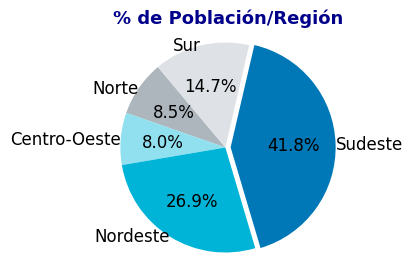

In [78]:
regiones = population_list_region
colores = ['#adb5bd', '#90e0ef', '#00b4d8', '#0077b6', '#dee2e6']
poblaciones = population_list_values

# Crear un gráfico de torta
plt.figure(figsize=(3, 3))
explode = (0, 0, 0, 0.05, 0)
plt.pie(poblaciones, labels=regiones, autopct='%1.1f%%', colors=colores, startangle=130, explode=explode,
        textprops={'fontsize': 12}, labeldistance=1)

plt.title('% de Población/Región', fontsize=13, color='darkblue',fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo

plt.savefig('/content/drive/MyDrive/Colab Notebooks/distribucion_poblacion_brasil.png')# Guardo la imagen

plt.show()


###Extrayendo datos del PIB: PRODUCTO INTERNO BRUTO EN USD

In [79]:
import pandas as pd

# URL de datos:
url = "https://es.wikipedia.org/wiki/Anexo:Estados_de_Brasil_por_PIB_per_c%C3%A1pita_(nominal)"

tablas = pd.read_html(url)
tabla = tablas[0]
df_data_brasil=pd.DataFrame(tabla)
df_data_brasil.head(5)

N.º            Unidad        Región PIB per cápita                        \
  N.º            Unidad        Región            BRL    USD    PPA       %   
0   1  Distrito Federal  Centro-Oeste         119649  23181  46304  245.04   
1   2         São Paulo       Sudeste          72647  14075  28114  148.78   
2   —           Sudeste       Sudeste          61828  11979  23927  126.62   
3   —      Centro-Oeste  Centro-Oeste          60454  11713  23396  123.81   
4   3    Santa Catarina           Sur          59872  11600  23170  122.62   

  PIB (BRL) Población (2022) Comparable (USD) Comparable (PPA)  
  PIB (BRL) Población (2022) Comparable (USD) Comparable (PPA)  
0    337060          2817068             Omán         Lituania  
1   3227031         44420459            Chile          Uruguay  
2   5245944         84847187       Kazajistán           México  
3    984671         16287809       Kazajistán           México  
4    455600          7609601       Kazajistán           México

###Crearndo DF con valores del PIB por region:

In [80]:
regiones_interes = ['Centro-Oeste', 'Sudeste', 'Sur', 'Norte', 'Nordeste']
df_pib_usd_region = df_data_brasil[df_data_brasil[('Unidad', 'Unidad')].isin(regiones_interes)][[('Unidad', 'Unidad'), ('PIB per cápita', 'USD')]]
df_pib_usd_region.reset_index(drop=True,inplace=True)
df_pib_usd_region

Unidad PIB per cápita
         Unidad            USD
0       Sudeste          11979
1  Centro-Oeste          11713
2           Sur          10985
3         Norte           6683
4      Nordeste           4910

###Ordenando el dataset con sort_values column 'USD':

In [81]:
df_pib=df_pib_usd_region[('PIB per cápita','USD')]
df_order = df_pib_usd_region.sort_values(by=('PIB per cápita','USD'),ascending=True)
df_order

Unidad PIB per cápita
         Unidad            USD
4      Nordeste           4910
3         Norte           6683
2           Sur          10985
1  Centro-Oeste          11713
0       Sudeste          11979

###Creando grafica compuesta del PIB de barras integfrando graf pie del PIB:

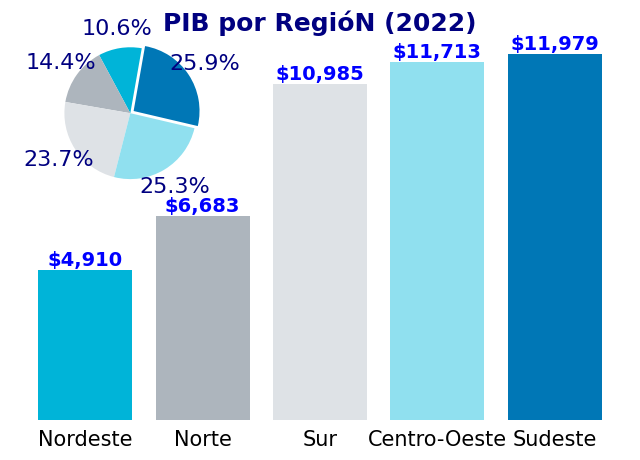

In [82]:
##3#   GRAFICA DE BARRAS CON GRAFICA PIE   ####

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Datos de la gráfica de barras
colores = ['#00b4d8','#adb5bd', '#dee2e6', '#90e0ef', '#0077b6']
# labels = ['S-E', 'N-E', 'C-O', 'N', 'S']
bar_positions = np.arange(len(df_order[('Unidad','Unidad')]))
bar_heights = df_order[('PIB per cápita','USD')]

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(bar_positions, bar_heights, color=colores)
plt.box(False)

# Configuraciones de la gráfica de barras
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_order[('Unidad','Unidad')], fontsize=15)
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'PIB por RegióN (2022)', color='navy', fontweight='bold', fontsize=18,pad=1)

# Mostrar etiquetas en las barras
for i, value in enumerate(bar_heights):
    ax.text(i, value, f'${value:,.0f}', ha='center', va='bottom', fontsize=14, color='blue', fontweight='bold')

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

#GRafica pie:
explode = (0, 0, 0, 0, 0.06)  # Separar la primera porción (Sureste)
axins = inset_axes(ax, width="38%", height="38%", loc='upper left', borderpad=0.3)
axins.pie(df_order[('PIB per cápita','USD')], autopct='%1.1f%%', colors=colores, startangle=80,
          textprops={'fontsize': 16,'color':'navy'}, labels=None, pctdistance=1.3,explode=explode)
axins.axis('equal')


# Guardar la imagen como PNG
plt.savefig('/content/drive/MyDrive/Colab Notebooks/pib_regiones_brasil.png')
plt.box(False)
plt.show()


###Ordenando el dataset ventas/años por regiones para grafica con geopandas:

In [83]:
# Dividir cada valor por 1000 y redondear
df_1K = (df_ventas_año_region / 1000).round()
df_1K = df_1K.T # Transponer el DataFrame
df_1K.columns = df_1K.columns.astype(str) # Convertir los años a cadenas (strings)
df_1K['Region'] = df_1K.index # Agregar una nueva columna 'region' con los índices actuales
df_1K.reset_index(drop=True, inplace=True)# Resetear el índice
df_1K = df_1K[['Region', '2019', '2020', '2021', '2022']] # Reorganizar las columnas en el orden deseado
df_1K = df_1K.rename_axis(None, axis=1) # Eliminar el nombre del índice
df_1K.iloc[:, 1:] = df_1K.iloc[:, 1:].astype(int) # Convertir los valores a enteros

df_1K

<ipython-input-83-ca508c7622d3>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_1K.iloc[:, 1:] = df_1K.iloc[:, 1:].astype(int) # Convertir los valores a enteros


Region  2019  2020  2021  2022
0       Sureste   523   649   871   980
1       Noreste   346   282   360   549
2  Centro-Oeste    67    91   125    98
3         Norte    72   107    70    99
4           Sur    44    61   110    99

###Ordenando filas siguiendo el orden que tiene dataset de Población:

In [84]:
# Ordenar filas:
order = ['Norte', 'Centro-Oeste', 'Noreste', 'Sureste', 'Sur']
df_ordered = df_1K.set_index('Region').loc[order].reset_index()
df_ordered

Region  2019  2020  2021  2022
0         Norte    72   107    70    99
1  Centro-Oeste    67    91   125    98
2       Noreste   346   282   360   549
3       Sureste   523   649   871   980
4           Sur    44    61   110    99

###Creando column se siglas:

In [85]:
region_mapping = {
    'Norte': 'N',
    'Centro-Oeste': 'C-O',
    'Noreste': 'N-E',
    'Sureste': 'S-E',
    'Sur': 'S'
}

df_ordered['Region_siglas'] = df_ordered['Region'].replace(region_mapping)
df_ordered

Region  2019  2020  2021  2022 Region_siglas
0         Norte    72   107    70    99             N
1  Centro-Oeste    67    91   125    98           C-O
2       Noreste   346   282   360   549           N-E
3       Sureste   523   649   871   980           S-E
4           Sur    44    61   110    99             S

<ipython-input-86-4b88e6dcf2ef>:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-86-4b88e6dcf2ef>:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.19, .29, text_box_año, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='blue',edgecolor='blue', alpha=1, boxstyle='round', pad=0.5, linewidth=1, color='blue'),fontweight='bold', color='white', zorder=150)
<ipython-input-86-4b88e6dcf2ef>:73: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.text(0.19, .22, text_box_valor, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='cente

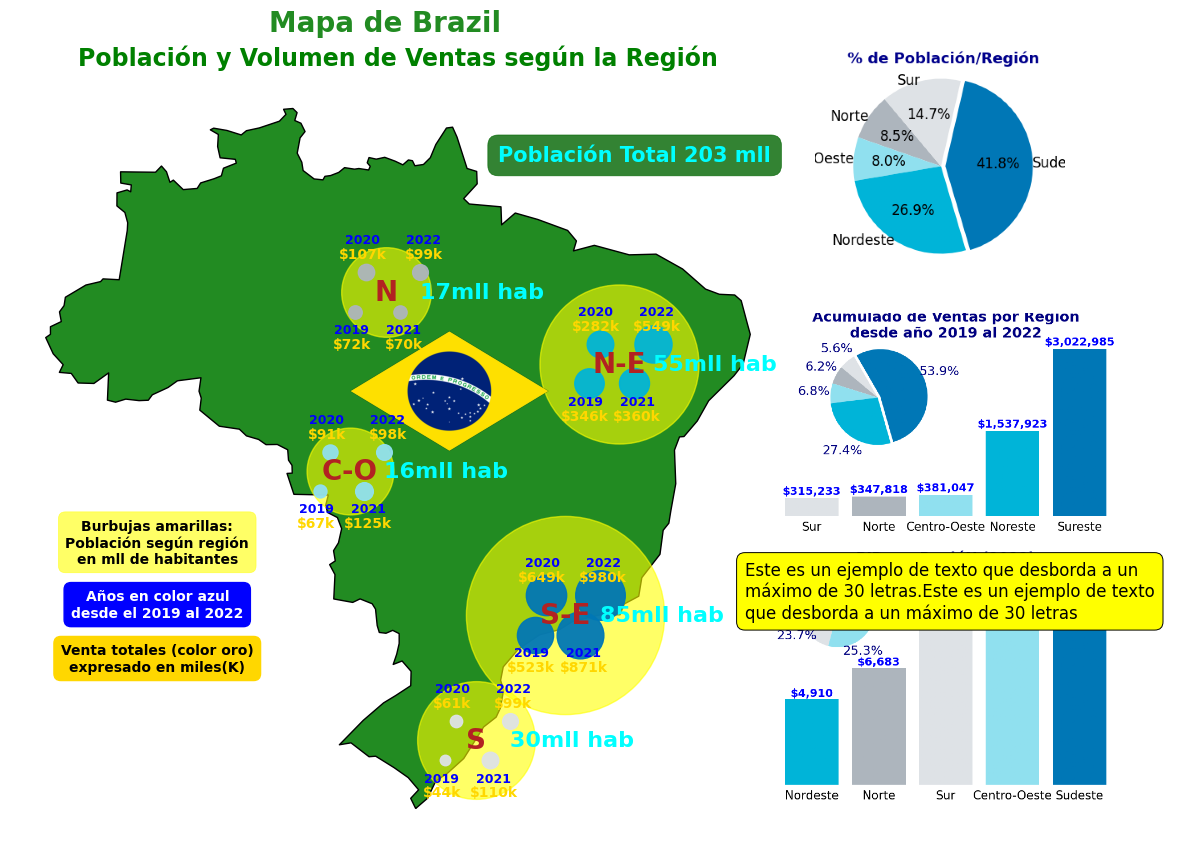

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

regiones = ['Norte', 'Centro-Oeste', 'Nordeste', 'Sudeste', 'Sur']
regiones = ['N', 'C-O', 'N-E', 'S-E', 'S']
poblaciones = [17355778,16289538, 54657621, 84840113, 29937706, ]
colores = ['#adb5bd', '#90e0ef', '#00b4d8', '#0077b6', '#dee2e6']
df_population = pd.DataFrame({'Region': regiones, 'Population': poblaciones})

df_population.to_csv('/content/drive/MyDrive/Colab Notebooks/poblacion_por_region_brasil_2022.csv', index=False)
df_population['Population_10k']=round(df_population['Population']/10000,0)
df_population['Population_mll']=round(df_population['Population']/1000000,0)

# Cargar el archivo de límites políticos de Brasil proporcionado por GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar Brasil
brasil = world[world['name'] == 'Brazil']

data=df_ordered
pop_df = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy([-55, -57, -42, -45, -50], [-5, -15, -9, -23, -30]))
# pop_df = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy([-45, -42,-57, -55, -50], [-23, -9,-15, -5, -30]))
pop_censo_df = gpd.GeoDataFrame(df_population, geometry=gpd.points_from_xy([-55, -57, -42, -45, -50], [-5, -15, -9, -23, -30]))
# pop_censo_df = gpd.GeoDataFrame(df_population, geometry=gpd.points_from_xy([-45, -42,-57, -55, -50], [-23, -9,-15, -5, -30]))

# Graficar el mapa de burbujas
fig, ax = plt.subplots(figsize=(10, 10))

brasil.plot(ax=ax, color='forestgreen', edgecolor='black')
img = plt.imread("/content/drive/MyDrive/Colab Notebooks/bandera_brasil-removebg-preview.png")
ax.imshow(img, extent=[-58, -45, -14.5, -6.5], alpha=1, aspect='auto', zorder=2)

# Tamaño de burbujas proporcional a la población en cada año
sizes_2019 = pop_df['2019']
sizes_2020 = pop_df['2020']
sizes_2021 = pop_df['2021']
sizes_2022 = pop_df['2022']

# Burbujas, posición y etiquetas:
pop_df['geometry_2019'] = pop_df['geometry'].translate(-1.7, -1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2019'].x, pop_df['geometry_2019'].y, sizes_2019, pop_df['Region_siglas'], colores,pop_df['2019']):
    ax.scatter(x, y, c=color, s=size*1.3, alpha=.95,zorder=70)
    ax.text(x-.2, y-1, '2019', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x-.2, y-1.8, f'${valor}k', fontsize=10, ha='center', va='center',color='gold',fontweight='bold',zorder=130)

# Burbujas, posición y etiquetas:
pop_df['geometry_2020'] = pop_df['geometry'].translate(-1.1, 1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2020'].x, pop_df['geometry_2020'].y, sizes_2020, pop_df['Region_siglas'], colores,pop_df['2020']):
    ax.scatter(x, y, c=color, s=size*1.3, alpha=.95,zorder=80)
    ax.text(x-.2, y+1.8, '2020', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x-.2, y+1, f'${valor}k', fontsize=10, ha='center', va='center',color='gold',fontweight='bold',zorder=130)

# Burbujas, posición y etiquetas:
pop_df['geometry_2021'] = pop_df['geometry'].translate(.8, -1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2021'].x, pop_df['geometry_2021'].y, sizes_2021, pop_df['Region_siglas'], colores,pop_df['2021']):
    ax.scatter(x, y, c=color, s=size*1.3, alpha=.95,zorder=90)
    ax.text(x+.2, y-1, '2021', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x+.2, y-1.8, f'${valor}k', fontsize=10, ha='center', va='center',color='gold',fontweight='bold',zorder=130)

# Burbujas, posición y etiquetas:
pop_df['geometry_2022'] = pop_df['geometry'].translate(1.9, 1.1)
for x, y, size, region, color, valor in zip(pop_df['geometry_2022'].x, pop_df['geometry_2022'].y, sizes_2022, pop_df['Region_siglas'], colores,pop_df['2022']):
    ax.scatter(x, y, c=color,marker='o', s=size*1.3 , alpha=.95,zorder=100)
    ax.text(x+.2, y+1.8, '2022', fontsize=9, ha='center', va='center',color='blue',fontweight='bold',zorder=130)
    ax.text(x+.2, y+1, f'${valor}k', fontsize=10, ha='center', va='center',color='gold',fontweight='bold',zorder=130)

#textos explicativos
text_box_año = 'Años en color azul\ndesde el 2019 al 2022'
ax.text(0.19, .29, text_box_año, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='blue',edgecolor='blue', alpha=1, boxstyle='round', pad=0.5, linewidth=1, color='blue'),fontweight='bold', color='white', zorder=150)
text_box_valor = 'Venta totales (color oro)\nexpresado en miles(K)'
ax.text(0.19, .22, text_box_valor, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='blue',edgecolor='blue', alpha=1, boxstyle='round', pad=0.5, linewidth=1, color='gold'),fontweight='bold', color='black', zorder=150)

# Texto para las burbujas de poblacion
poblacion_brazil=(df_population.Population.sum()/1000000).round()
text_population_title = f'Población Total {poblacion_brazil:0.0f} mll'
text_population = 'Burbujas amarillas:\nPoblación según región\nen mll de habitantes'
ax.text(.63, .88, text_population_title, transform=ax.transAxes, fontsize=15, verticalalignment='bottom',horizontalalignment='left', bbox=dict(facecolor='red', alpha=0.8, boxstyle='round', pad=0.5, linewidth=0.5,color='darkgreen'),fontweight='bold', color='cyan', zorder=150)
ax.text(.19, .36, text_population, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', bbox=dict(facecolor='red', alpha=0.6, boxstyle='round', pad=0.5, linewidth=0.5, color='yellow'),fontweight='bold', color='black', zorder=150)

# Etiquetas de región
for x, y, label,sizes_censo, habitantes_mll in zip(pop_df['geometry'].x, pop_df['geometry'].y, pop_df['Region_siglas'],pop_censo_df['Population_10k'],pop_censo_df['Population_mll']):
    ax.text(x, y, label, fontsize=20, ha='center', va='center',color='firebrick', fontweight='bold',zorder=110)
    #Pablación:
    ax.text(x+1.9, y, f'{int(habitantes_mll)}mll hab', fontsize=16, ha='left', va='center',color='cyan', fontweight='bold',zorder=110)
    #Burbuja de population:
    ax.scatter(x, y, c='yellow', s=sizes_censo*2.4, alpha=0.6)

# Añadir la imagen del gráfico de torta
img_pie_path = '/content/drive/MyDrive/Colab Notebooks/distribucion_poblacion_brasil.png'
img_ventas_total = '/content/drive/MyDrive/Colab Notebooks/distribucion_ventas_total_brasil_insertGraf.png'
img_PIB = '/content/drive/MyDrive/Colab Notebooks/pib_regiones_brasil.png'

# Añadir la imagen pie (% de poblacion segun region)
img_pie = OffsetImage(plt.imread(img_pie_path), zoom=.6)
ab = AnnotationBbox(img_pie, (1.2,0.88), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0,zorder=-1000)
ax.add_artist(ab)

# Añadir la imagen del gráfico de barras (ventas total)
img_ventas = OffsetImage(plt.imread(img_ventas_total), zoom=.41)
ab_ventas = AnnotationBbox(img_ventas, (1.2, 0.54), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0, zorder=-500)
ax.add_artist(ab_ventas)

# Añadir la imagen del gráfico PIE (PIB)
img_ventas = OffsetImage(plt.imread(img_PIB), zoom=.41)
ab_ventas = AnnotationBbox(img_ventas, (1.2, 0.22), frameon=False, xycoords='axes fraction', boxcoords='axes fraction', pad=0, zorder=-300)
ax.add_artist(ab_ventas)

title='Mapa de Brazil'
sub_title='Población y Volumen de Ventas según la Región'
plt.title(sub_title, color='green', fontsize='17',fontweight='bold')
plt.text(0.5, 0.93, title, color='forestgreen', fontsize='20', fontweight='bold', ha='center', va='center', transform=plt.gcf().transFigure)



# Configuración adicional para quitar las líneas al lado de los ejes
plt.box(False)
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)

#Texto insigt
insight_mapa = "Este es un ejemplo de texto que desborda a un máximo de 30 letras.Este es un ejemplo de texto que desborda a un máximo de 30 letras"
ax.text(-35,-20, insight_mapa, ha='left', va='top', fontsize=12, bbox=dict(facecolor='yellow', edgecolor='black', pad=.5, boxstyle='round', linewidth=.7), wrap=True)

plt.show()

# Pregunta 4

Crea una función pregunta_4(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe   df_modo_envio y guarda unicamente las columnas 'modo_envio' y 'segmento_cliente'.

In [87]:
def pregunta_4():
  global df_ventas, df_ventas_limpio, df_ventas_año,df_modo_envio
  df_modo_envio= (df_ventas_limpio[['modo_envio','segmento_cliente']]).copy()
  return df_modo_envio
pregunta_4()

modo_envio segmento_cliente
0            Económico              B2C
1            Económico              B2C
2            Económico              B2B
3     Entrega estándar              B2C
4     Entrega estándar              B2C
...                ...              ...
7205  Entrega estándar              B2C
7206  Entrega estándar              B2B
7207  Entrega estándar              B2B
7208         Económico              B2C
7209         Económico              B2C

[7210 rows x 2 columns]

Por último, genera una tabla cruzada con el método pd.crosstab:

In [88]:
df_modo_envio=pd.crosstab(index = df_modo_envio.modo_envio, columns = df_modo_envio.segmento_cliente).sort_values("B2B")
df_modo_envio

segmento_cliente   B2B   B2C
modo_envio                  
24 horas           171   231
Envío rápido       543   542
Económico          707   755
Entrega estándar  2048  2213

###2. Visualización:

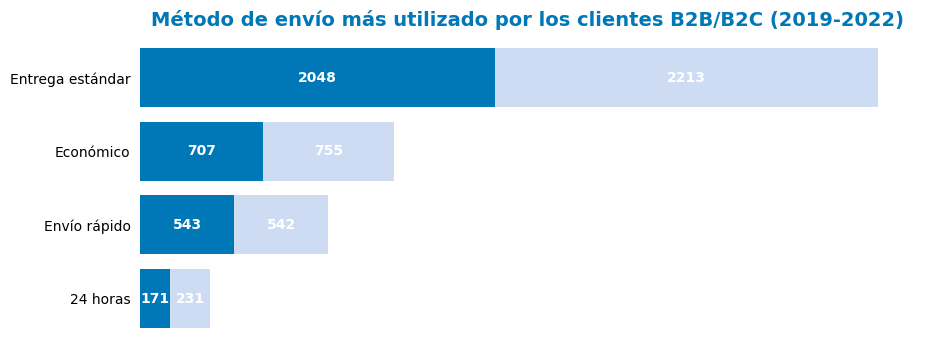

In [89]:
fig, ax = plt.subplots(figsize=(10,4))
colores=['#0077b6', '#CDDBF3']
ejeX=df_modo_envio.index
eje1Y=df_modo_envio['B2B']
eje2Y=df_modo_envio['B2C']
ax.barh(ejeX, eje1Y, color=colores[0]),ax.barh(ejeX, eje2Y, left=eje1Y, color=colores[1])
for container in ax.containers:
  # labels = [valor for valor in container] #Convertir a texto
  ax.bar_label(container, label_type='center',  fmt='%i',color='white', fontweight='bold')

plt.title('Método de envío más utilizado por los clientes B2B/B2C (2019-2022)',fontsize=14,color='#0077b6', fontweight='bold')

plt.box(False)
plt.xlabel('')
plt.xticks([])

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.show()

# Pregunta 5
Crea una función pregunta_5(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

###1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en nuevo dataframe df_ventas_sp y guarda sólo las columnas fecha_pedido y total_venta sólo de los registros con valor São Paulo en columna estado. La columna fecha_pedido debe ser el nuevo índice.

In [90]:
df_ventas_limpio.head()

fecha_pedido fecha_envio        modo_envio     nombre_cliente  \
0   2021-11-09  2021-11-12         Económico    Thiago Silveira   
1   2021-11-09  2021-11-12         Económico    Thiago Silveira   
2   2021-06-13  2021-06-17         Económico      Giovanna Lima   
3   2020-10-12  2020-10-19  Entrega estándar  Ana Júlia da Cruz   
4   2019-06-10  2019-06-15  Entrega estándar        Sophia Dias   

  segmento_cliente          ciudad          estado   region  \
0              B2C  Ribeirão Preto       São Paulo  Sureste   
1              B2C  Ribeirão Preto       São Paulo  Sureste   
2              B2B  Rio de Janeiro  Rio de Janeiro  Sureste   
3              B2C   Foz do Iguaçu          Paraná      Sur   
4              B2C  Rio de Janeiro  Rio de Janeiro  Sureste   

   departamento_producto             tipo_producto  precio_base  \
0                   Ropa                 Camisetas       409.70   
1                   Ropa                     Jeans       705.10   
2  Productos de Limpieza  Toallitas desinfectantes        19.02   
3  Productos de Limpieza           Papel higiénico        35.88   
4                   Ropa                  Vestidos        20.29   

   precio_unit_sin_desc  descuento  precio_unit_venta  cantidad_pedido  \
0                445.33        0.0             445.33                2   
1                829.53        0.0             829.53                3   
2                 24.86        0.0              24.86                2   
3                 42.24        0.1              38.02                2   
4                 23.73        0.0              23.73                7   

   total_venta  total_ganancia  
0       890.66           71.26  
1      2488.59          373.29  
2        49.72           11.68  
3        76.04            4.28  
4       166.11           24.08

In [91]:
df_ventas_sp_large=df_ventas_limpio.copy() # Haciendo la copia
df_ventas_sp_large = df_ventas_sp_large[df_ventas_sp_large['estado'] == 'São Paulo'] # selección sólo de San Pablo
# Suponiendo que 'total_venta' es la columna que contiene las ventas
df_ventas_sp_large['año']= df_ventas_sp_large.fecha_pedido.dt.year
df_ventas_sp_large['mes']= df_ventas_sp_large.fecha_pedido.dt.month
df_ventas_sp_large.set_index('fecha_pedido', inplace=True) #nuevo index

# df_ventas_sp_large=df_ventas_sp_large.resample('Q').agg('sum')### AGRUPA POR TRIMESTRE
df_ventas_sp_large
# df_group_dpto = df_ventas_sp_large.groupby(['departamento_producto'])['total_venta'].sum()
# df_group_dpto

fecha_envio        modo_envio           nombre_cliente  \
fecha_pedido                                                          
2021-11-09    2021-11-12         Económico          Thiago Silveira   
2021-11-09    2021-11-12         Económico          Thiago Silveira   
2019-11-12    2019-11-19  Entrega estándar           Gabriel da Paz   
2022-09-11    2022-09-16  Entrega estándar  Maria Eduarda Rodrigues   
2019-10-21    2019-10-26         Económico               Lara Pinto   
...                  ...               ...                      ...   
2021-12-06    2021-12-11         Económico               Yuri Viana   
2020-06-29    2020-07-03  Entrega estándar              Erick Pinto   
2020-06-29    2020-07-03  Entrega estándar              Erick Pinto   
2020-09-07    2020-09-10         Económico         Eduarda Teixeira   
2022-08-04    2022-08-07      Envío rápido      João Pedro Silveira   

             segmento_cliente                ciudad     estado   region  \
fecha_pedido                                                              
2021-11-09                B2C        Ribeirão Preto  São Paulo  Sureste   
2021-11-09                B2C        Ribeirão Preto  São Paulo  Sureste   
2019-11-12                B2C  Itapecerica da Serra  São Paulo  Sureste   
2022-09-11                B2B              Botucatu  São Paulo  Sureste   
2019-10-21                B2C               Itapevi  São Paulo  Sureste   
...                       ...                   ...        ...      ...   
2021-12-06                B2B              Campinas  São Paulo  Sureste   
2020-06-29                B2B           São Vicente  São Paulo  Sureste   
2020-06-29                B2B           São Vicente  São Paulo  Sureste   
2020-09-07                B2C                  Mauá  São Paulo  Sureste   
2022-08-04                B2C                Osasco  São Paulo  Sureste   

              departamento_producto             tipo_producto  precio_base  \
fecha_pedido                                                                 
2021-11-09                     Ropa                 Camisetas       409.70   
2021-11-09                     Ropa                     Jeans       705.10   
2019-11-12    Productos de Limpieza           Papel higiénico       373.56   
2022-09-11             Electrónicos         Cámaras digitales       118.06   
2019-10-21    Productos de Limpieza           Papel higiénico       176.56   
...                             ...                       ...          ...   
2021-12-06    Productos de Limpieza           Limpiacristales        40.76   
2020-06-29             Electrónicos              Lámparas LED       156.50   
2020-06-29    Productos de Limpieza     Limpiador de inodoros        81.35   
2020-09-07                     Ropa                Zapatillas       254.32   
2022-08-04    Productos de Limpieza  Toallitas desinfectantes         9.41   

              precio_unit_sin_desc  descuento  precio_unit_venta  \
fecha_pedido                                                       
2021-11-09                  445.33        0.0             445.33   
2021-11-09                  829.53        0.0             829.53   
2019-11-12                  377.33        0.0             377.33   
2022-09-11                  138.99        0.1             125.09   
2019-10-21                  180.16        0.0             180.16   
...                            ...        ...                ...   
2021-12-06                   53.28        0.0              53.28   
2020-06-29                  203.25        0.0             203.25   
2020-06-29                   95.71        0.0              95.71   
2020-09-07                  292.33        0.0             292.33   
2022-08-04                   12.48        0.1              11.23   

              cantidad_pedido  total_venta  total_ganancia   año  mes  
fecha_pedido                                                           
2021-11-09                  2       890.66           71.26  2021   11

In [92]:
#####################   CREANDO DF POR TIPO DE PRODUCTO SEGÚN TRIMESTRE Y AÑO=2019 SELECCIONANDO LOS TRES DE MAYOR VOLUMEN DE VENTAS:   #####################
lista_group_tipo_producto_trimestre_1_2019 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([1, 2, 3])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

lista_group_tipo_producto_trimestre_2_2019= df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([4, 5, 6])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

lista_group_tipo_producto_trimestre_3_2019 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([7, 8, 9])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

lista_group_tipo_producto_trimestre_4_2019 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([10, 11, 12])) & (df_ventas_sp_large['año'] == 2019)]\
    .groupby(['tipo_producto'])['total_venta'].sum()

df_tipo_producto_trimestres_2019 = pd.DataFrame({
    'total_venta_trimestre_1_2019': lista_group_tipo_producto_trimestre_1_2019,
    'total_venta_trimestre_2_2019': lista_group_tipo_producto_trimestre_2_2019,
    'total_venta_trimestre_3_2019': lista_group_tipo_producto_trimestre_3_2019,
    'total_venta_trimestre_4_2019': lista_group_tipo_producto_trimestre_4_2019
})
df_tipo_producto_trimestres_2019.dropna(inplace=True) #Eliminar nan

# Calcular la suma por filas
df_tipo_producto_trimestres_2019['total_venta_suma'] = df_tipo_producto_trimestres_2019.sum(axis=1)
top_3_tipo_producto_trimestres_2019 = df_tipo_producto_trimestres_2019.nlargest(3, 'total_venta_suma') # Seleccionar las tres mayores
top_3_tipo_producto_trimestres_2019 = top_3_tipo_producto_trimestres_2019.drop('total_venta_suma', axis=1) # Eliminar la columna temporal de suma
top_3_tipo_producto_trimestres_2019


total_venta_trimestre_1_2019  total_venta_trimestre_2_2019  \
tipo_producto                                                                   
Jeans                                   9998.02                       2488.61   
Cámaras digitales                       4596.28                       6924.12   
Papel higiénico                         1276.57                       1319.67   

                   total_venta_trimestre_3_2019  total_venta_trimestre_4_2019  
tipo_producto                                                                  
Jeans                                  21142.68                      24408.41  
Cámaras digitales                      16666.58                      19636.33  
Papel higiénico                        10333.70                      24426.25

In [93]:
# Crear DataFrame por tipo de producto según trimestre y año
def create_df_for_year(year):
    lista_group_tipo_producto_trimestre_1 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([1, 2, 3])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    lista_group_tipo_producto_trimestre_2 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([4, 5, 6])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    lista_group_tipo_producto_trimestre_3 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([7, 8, 9])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    lista_group_tipo_producto_trimestre_4 = df_ventas_sp_large[(df_ventas_sp_large['mes'].isin([10, 11, 12])) & (df_ventas_sp_large['año'] == year)]\
        .groupby(['tipo_producto'])['total_venta'].sum()

    df_tipo_producto_trimestres = pd.DataFrame({
        f'total_venta_trimestre_1_{year}': lista_group_tipo_producto_trimestre_1,
        f'total_venta_trimestre_2_{year}': lista_group_tipo_producto_trimestre_2,
        f'total_venta_trimestre_3_{year}': lista_group_tipo_producto_trimestre_3,
        f'total_venta_trimestre_4_{year}': lista_group_tipo_producto_trimestre_4
    })

    df_tipo_producto_trimestres.dropna(inplace=True)  # Eliminar nan

    # Calcular la suma por filas
    df_tipo_producto_trimestres[f'total_venta_suma_{year}'] = df_tipo_producto_trimestres.sum(axis=1)

    return df_tipo_producto_trimestres

# Crear DataFrames para los años 2019, 2020, 2021 y 2022
df_tipo_producto_trimestres_2019 = create_df_for_year(2019)
df_tipo_producto_trimestres_2020 = create_df_for_year(2020)
df_tipo_producto_trimestres_2021 = create_df_for_year(2021)
df_tipo_producto_trimestres_2022 = create_df_for_year(2022)

# Seleccionar las tres mayores
top=10
top_tipo_producto_trimestres_2019 = df_tipo_producto_trimestres_2019.nlargest(top, f'total_venta_suma_2019').drop(f'total_venta_suma_2019', axis=1)
top_tipo_producto_trimestres_2020 = df_tipo_producto_trimestres_2020.nlargest(top, f'total_venta_suma_2020').drop(f'total_venta_suma_2020', axis=1)
top_tipo_producto_trimestres_2021 = df_tipo_producto_trimestres_2021.nlargest(top, f'total_venta_suma_2021').drop(f'total_venta_suma_2021', axis=1)
top_tipo_producto_trimestres_2022 = df_tipo_producto_trimestres_2022.nlargest(top, f'total_venta_suma_2022').drop(f'total_venta_suma_2022', axis=1)


In [94]:
top_3_tipo_producto_trimestres_2019

total_venta_trimestre_1_2019  total_venta_trimestre_2_2019  \
tipo_producto                                                                   
Jeans                                   9998.02                       2488.61   
Cámaras digitales                       4596.28                       6924.12   
Papel higiénico                         1276.57                       1319.67   

                   total_venta_trimestre_3_2019  total_venta_trimestre_4_2019  
tipo_producto                                                                  
Jeans                                  21142.68                      24408.41  
Cámaras digitales                      16666.58                      19636.33  
Papel higiénico                        10333.70                      24426.25

In [95]:
year=2019
top_3_tipo_producto_trimestres_2019[f'total_venta_suma_{year}'] = top_3_tipo_producto_trimestres_2019.sum(axis=1)
top_3_tipo_producto_trimestres_2019

total_venta_trimestre_1_2019  total_venta_trimestre_2_2019  \
tipo_producto                                                                   
Jeans                                   9998.02                       2488.61   
Cámaras digitales                       4596.28                       6924.12   
Papel higiénico                         1276.57                       1319.67   

                   total_venta_trimestre_3_2019  total_venta_trimestre_4_2019  \
tipo_producto                                                                   
Jeans                                  21142.68                      24408.41   
Cámaras digitales                      16666.58                      19636.33   
Papel higiénico                        10333.70                      24426.25   

                   total_venta_suma_2019  
tipo_producto                             
Jeans                           58037.72  
Cámaras digitales               47823.31  
Papel higiénico                 37356.19

In [96]:
dataframes = [top_tipo_producto_trimestres_2019, top_tipo_producto_trimestres_2020, top_tipo_producto_trimestres_2021, top_tipo_producto_trimestres_2022]

df_tipo_producto_trimestres_total = pd.concat(dataframes, axis=1) # Concatenar DataFrames
df_tipo_producto_trimestres_total = df_tipo_producto_trimestres_total.loc[:,~df_tipo_producto_trimestres_total.columns.duplicated()] # Eliminar columnas duplicadas (si las hay)
df_tipo_producto_trimestres_total.dropna(inplace=True) #eliminar nan
df_tipo_producto_trimestres_total

total_venta_trimestre_1_2019  \
tipo_producto                                        
Jeans                                      9998.02   
Cámaras digitales                          4596.28   
Papel higiénico                            1276.57   
Ambientador en spray                        842.24   
Lámparas LED                               3132.72   
Smartphones                                 106.08   
Bolsas de basura                           1634.46   
Vestidos                                   1283.40   

                      total_venta_trimestre_2_2019  \
tipo_producto                                        
Jeans                                      2488.61   
Cámaras digitales                          6924.12   
Papel higiénico                            1319.67   
Ambientador en spray                       1988.58   
Lámparas LED                               1100.96   
Smartphones                                 339.92   
Bolsas de basura                           1062.59   
Vestidos                                    640.02   

                      total_venta_trimestre_3_2019  \
tipo_producto                                        
Jeans                                     21142.68   
Cámaras digitales                         16666.58   
Papel higiénico                           10333.70   
Ambientador en spray                       3279.11   
Lámparas LED                               3067.76   
Smartphones                                5167.22   
Bolsas de basura                           2189.87   
Vestidos                                   4640.72   

                      total_venta_trimestre_4_2019  \
tipo_producto                                        
Jeans                                     24408.41   
Cámaras digitales                         19636.33   
Papel higiénico                           24426.25   
Ambientador en spray                       5021.34   
Lámparas LED                               2726.00   
Smartphones                                3217.67   
Bolsas de basura                           3395.61   
Vestidos                                   1423.47   

                      total_venta_trimestre_1_2020  \
tipo_producto                                        
Jeans                                      1304.24   
Cámaras digitales                          6323.04   
Papel higiénico                            8377.51   
Ambientador en spray                        691.65   
Lámparas LED                               4438.83   
Smartphones                                1777.23   
Bolsas de basura                           1766.64   
Vestidos                                    750.08   

                      total_venta_trimestre_2_2020  \
tipo_producto                                        
Jeans                                      3456.24   
Cámaras digitales                          5484.74   
Papel higiénico                            2667.29   
Ambientador en spray                       7082.12   
Lámparas LED                              29797.43   
Smartphones                                2074.37   
Bolsas de basura                           1184.87   
Vestidos                                   1504.61   

                      total_venta_trimestre_3_2020  \
tipo_producto                                        
Jeans                                     16065.75   
Cámaras digitales                         17261.04   
Papel higiénico                           11337.43   
Ambientador en spray                       1935.10   
Lámparas LED                               5531.57   
Smartphones                               20866.17   
Bolsas de basura                           4018.16   
Vestidos                                   4350.99   

                      total_venta_trimestre_4_2020  \
tipo_producto                                        
Jeans                                     26070.09   
Cámaras digitales                         33864.05   
Papel higiénico    

In [97]:
df_tipo_producto_trimestres_total['total_venta'] = df_tipo_producto_trimestres_total.sum(axis=1)
df_tipo_producto_trimestres_total

total_venta_trimestre_1_2019  \
tipo_producto                                        
Jeans                                      9998.02   
Cámaras digitales                          4596.28   
Papel higiénico                            1276.57   
Ambientador en spray                        842.24   
Lámparas LED                               3132.72   
Smartphones                                 106.08   
Bolsas de basura                           1634.46   
Vestidos                                   1283.40   

                      total_venta_trimestre_2_2019  \
tipo_producto                                        
Jeans                                      2488.61   
Cámaras digitales                          6924.12   
Papel higiénico                            1319.67   
Ambientador en spray                       1988.58   
Lámparas LED                               1100.96   
Smartphones                                 339.92   
Bolsas de basura                           1062.59   
Vestidos                                    640.02   

                      total_venta_trimestre_3_2019  \
tipo_producto                                        
Jeans                                     21142.68   
Cámaras digitales                         16666.58   
Papel higiénico                           10333.70   
Ambientador en spray                       3279.11   
Lámparas LED                               3067.76   
Smartphones                                5167.22   
Bolsas de basura                           2189.87   
Vestidos                                   4640.72   

                      total_venta_trimestre_4_2019  \
tipo_producto                                        
Jeans                                     24408.41   
Cámaras digitales                         19636.33   
Papel higiénico                           24426.25   
Ambientador en spray                       5021.34   
Lámparas LED                               2726.00   
Smartphones                                3217.67   
Bolsas de basura                           3395.61   
Vestidos                                   1423.47   

                      total_venta_trimestre_1_2020  \
tipo_producto                                        
Jeans                                      1304.24   
Cámaras digitales                          6323.04   
Papel higiénico                            8377.51   
Ambientador en spray                        691.65   
Lámparas LED                               4438.83   
Smartphones                                1777.23   
Bolsas de basura                           1766.64   
Vestidos                                    750.08   

                      total_venta_trimestre_2_2020  \
tipo_producto                                        
Jeans                                      3456.24   
Cámaras digitales                          5484.74   
Papel higiénico                            2667.29   
Ambientador en spray                       7082.12   
Lámparas LED                              29797.43   
Smartphones                                2074.37   
Bolsas de basura                           1184.87   
Vestidos                                   1504.61   

                      total_venta_trimestre_3_2020  \
tipo_producto                                        
Jeans                                     16065.75   
Cámaras digitales                         17261.04   
Papel higiénico                           11337.43   
Ambientador en spray                       1935.10   
Lámparas LED                               5531.57   
Smartphones                               20866.17   
Bolsas de basura                           4018.16   
Vestidos                                   4350.99   

                      total_venta_trimestre_4_2020  \
tipo_producto                                        
Jeans                                     26070.09   
Cámaras digitales                         33864.05   
Papel higiénico    

In [98]:
########     DATAFRAME REPRESENTANDO EL TOP N DE PRODUCTOS EN SAN PABLO POR TRIMESTRE Y POR AÑO    ##########

top=5
df_top_tipo_producto_trimestres_2019_top5 = df_tipo_producto_trimestres_total.nlargest(top, 'total_venta')
df_top_tipo_producto_trimestres_2019_top5

total_venta_trimestre_1_2019  total_venta_trimestre_2_2019  \
tipo_producto                                                                   
Jeans                                   9998.02                       2488.61   
Cámaras digitales                       4596.28                       6924.12   
Lámparas LED                            3132.72                       1100.96   
Papel higiénico                         1276.57                       1319.67   
Smartphones                              106.08                        339.92   

                   total_venta_trimestre_3_2019  total_venta_trimestre_4_2019  \
tipo_producto                                                                   
Jeans                                  21142.68                      24408.41   
Cámaras digitales                      16666.58                      19636.33   
Lámparas LED                            3067.76                       2726.00   
Papel higiénico                        10333.70                      24426.25   
Smartphones                             5167.22                       3217.67   

                   total_venta_trimestre_1_2020  total_venta_trimestre_2_2020  \
tipo_producto                                                                   
Jeans                                   1304.24                       3456.24   
Cámaras digitales                       6323.04                       5484.74   
Lámparas LED                            4438.83                      29797.43   
Papel higiénico                         8377.51                       2667.29   
Smartphones                             1777.23                       2074.37   

                   total_venta_trimestre_3_2020  total_venta_trimestre_4_2020  \
tipo_producto                                                                   
Jeans                                  16065.75                      26070.09   
Cámaras digitales                      17261.04                      33864.05   
Lámparas LED                            5531.57                       5817.29   
Papel higiénico                        11337.43                      10372.66   
Smartphones                            20866.17                      30107.76   

                   total_venta_trimestre_1_2021  total_venta_trimestre_2_2021  \
tipo_producto                                                                   
Jeans                                   1110.60                      27680.88   
Cámaras digitales                       5067.63                       7306.51   
Lámparas LED                            6487.74                       4387.11   
Papel higiénico                         4598.99                       7436.90   
Smartphones                             1184.22                       4945.67   

                   total_venta_trimestre_3_2021  total_venta_trimestre_4_2021  \
tipo_producto                                                                   
Jeans                                   9327.89                      35812.92   
Cámaras digitales                      11810.65                      24989.46   
Lámparas LED                           22195.43                      59669.00   
Papel higiénico                        15254.63                      12998.58   
Smartphones                            14126.69                       3876.56   

                   total_venta_trimestre_1_2022  total_venta_trimestre_2_2022  \
tipo_producto                                                                   
Jeans                                  15231.51                      11835.56   
Cámaras digitales                       8156.04                      19405.50   
Lámparas LED                            4706.61                       6332.37   
Papel higiénico                         7411.05                       7379.58   
Smartphones                             2055.58                       2028.93   

                   total_venta_trimestre_3_

In [99]:
df_grafica_top_productos=df_top_tipo_producto_trimestres_2019_top5.drop(f'total_venta', axis=1).T ### ELIMINANDO COLUMNA SUMA
df_grafica_top_productos_index=df_grafica_top_productos.copy()
# df_grafica_top_productos_index['trimestre']=df_grafica_top_productos_index.index
# df_grafica_top_productos_index
df_grafica_top_productos_index.reset_index(inplace=True,drop=True)
df_grafica_top_productos_orden = df_grafica_top_productos_index.rename_axis('orden')

df_grafica_top_productos_orden

tipo_producto     Jeans  Cámaras digitales  Lámparas LED  Papel higiénico  \
orden                                                                       
0               9998.02            4596.28       3132.72          1276.57   
1               2488.61            6924.12       1100.96          1319.67   
2              21142.68           16666.58       3067.76         10333.70   
3              24408.41           19636.33       2726.00         24426.25   
4               1304.24            6323.04       4438.83          8377.51   
5               3456.24            5484.74      29797.43          2667.29   
6              16065.75           17261.04       5531.57         11337.43   
7              26070.09           33864.05       5817.29         10372.66   
8               1110.60            5067.63       6487.74          4598.99   
9              27680.88            7306.51       4387.11          7436.90   
10              9327.89           11810.65      22195.43         15254.63   
11             35812.92           24989.46      59669.00         12998.58   
12             15231.51            8156.04       4706.61          7411.05   
13             11835.56           19405.50       6332.37          7379.58   
14             32708.57           28146.78      24568.90          5792.90   
15             30169.91           50609.84      10672.34         17850.82   

tipo_producto  Smartphones  
orden                       
0                   106.08  
1                   339.92  
2                  5167.22  
3                  3217.67  
4                  1777.23  
5                  2074.37  
6                 20866.17  
7                 30107.76  
8                  1184.22  
9                  4945.67  
10                14126.69  
11                 3876.56  
12                 2055.58  
13                 2028.93  
14                10651.55  
15                20616.24

In [100]:
df_grafica_top_productos_index

tipo_producto     Jeans  Cámaras digitales  Lámparas LED  Papel higiénico  \
0               9998.02            4596.28       3132.72          1276.57   
1               2488.61            6924.12       1100.96          1319.67   
2              21142.68           16666.58       3067.76         10333.70   
3              24408.41           19636.33       2726.00         24426.25   
4               1304.24            6323.04       4438.83          8377.51   
5               3456.24            5484.74      29797.43          2667.29   
6              16065.75           17261.04       5531.57         11337.43   
7              26070.09           33864.05       5817.29         10372.66   
8               1110.60            5067.63       6487.74          4598.99   
9              27680.88            7306.51       4387.11          7436.90   
10              9327.89           11810.65      22195.43         15254.63   
11             35812.92           24989.46      59669.00         12998.58   
12             15231.51            8156.04       4706.61          7411.05   
13             11835.56           19405.50       6332.37          7379.58   
14             32708.57           28146.78      24568.90          5792.90   
15             30169.91           50609.84      10672.34         17850.82   

tipo_producto  Smartphones  
0                   106.08  
1                   339.92  
2                  5167.22  
3                  3217.67  
4                  1777.23  
5                  2074.37  
6                 20866.17  
7                 30107.76  
8                  1184.22  
9                  4945.67  
10                14126.69  
11                 3876.56  
12                 2055.58  
13                 2028.93  
14                10651.55  
15                20616.24

In [101]:
# Lista de nombres para crear una columnas y luego renombrar el index:
periodos = ['2019: Ene-Mar', '2019: Abr-Jun', '2019: Jul-Set', '2019: Oct-Dic',
            '2020: Ene-Mar', '2020: Abr-Jun', '2020: Jul-Set', '2020: Oct-Dic',
            '2021: Ene-Mar', '2021: Abr-Jun', '2021: Jul-Set', '2021: Oct-Dic',
            '2022: Ene-Mar', '2022: Abr-Jun', '2022: Jul-Set', '2022: Oct-Dic']

df_grafica_top_productos_index['periodo'] = periodos
df_grafica_top_productos_index = df_grafica_top_productos_index.set_index('periodo') # Establecer la nueva columna como índice
df_grafica_top_productos_index

tipo_producto     Jeans  Cámaras digitales  Lámparas LED  Papel higiénico  \
periodo                                                                     
2019: Ene-Mar   9998.02            4596.28       3132.72          1276.57   
2019: Abr-Jun   2488.61            6924.12       1100.96          1319.67   
2019: Jul-Set  21142.68           16666.58       3067.76         10333.70   
2019: Oct-Dic  24408.41           19636.33       2726.00         24426.25   
2020: Ene-Mar   1304.24            6323.04       4438.83          8377.51   
2020: Abr-Jun   3456.24            5484.74      29797.43          2667.29   
2020: Jul-Set  16065.75           17261.04       5531.57         11337.43   
2020: Oct-Dic  26070.09           33864.05       5817.29         10372.66   
2021: Ene-Mar   1110.60            5067.63       6487.74          4598.99   
2021: Abr-Jun  27680.88            7306.51       4387.11          7436.90   
2021: Jul-Set   9327.89           11810.65      22195.43         15254.63   
2021: Oct-Dic  35812.92           24989.46      59669.00         12998.58   
2022: Ene-Mar  15231.51            8156.04       4706.61          7411.05   
2022: Abr-Jun  11835.56           19405.50       6332.37          7379.58   
2022: Jul-Set  32708.57           28146.78      24568.90          5792.90   
2022: Oct-Dic  30169.91           50609.84      10672.34         17850.82   

tipo_producto  Smartphones  
periodo                     
2019: Ene-Mar       106.08  
2019: Abr-Jun       339.92  
2019: Jul-Set      5167.22  
2019: Oct-Dic      3217.67  
2020: Ene-Mar      1777.23  
2020: Abr-Jun      2074.37  
2020: Jul-Set     20866.17  
2020: Oct-Dic     30107.76  
2021: Ene-Mar      1184.22  
2021: Abr-Jun      4945.67  
2021: Jul-Set     14126.69  
2021: Oct-Dic      3876.56  
2022: Ene-Mar      2055.58  
2022: Abr-Jun      2028.93  
2022: Jul-Set     10651.55  
2022: Oct-Dic     20616.24

In [102]:
df_tipo_producto_trimestres_total.index

Index(['Jeans', 'Cámaras digitales', 'Papel higiénico', 'Ambientador en spray',
       'Lámparas LED', 'Smartphones', 'Bolsas de basura', 'Vestidos'],
      dtype='object', name='tipo_producto')

In [103]:
!pip install bar_chart_race --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.6 MB/s eta 0:00:00


In [104]:
df_grafica_top_productos_index.index

Index(['2019: Ene-Mar', '2019: Abr-Jun', '2019: Jul-Set', '2019: Oct-Dic',
       '2020: Ene-Mar', '2020: Abr-Jun', '2020: Jul-Set', '2020: Oct-Dic',
       '2021: Ene-Mar', '2021: Abr-Jun', '2021: Jul-Set', '2021: Oct-Dic',
       '2022: Ene-Mar', '2022: Abr-Jun', '2022: Jul-Set', '2022: Oct-Dic'],
      dtype='object', name='periodo')

In [105]:
import bar_chart_race as bcr

n_barras=len(df_grafica_top_productos_index.index)

animacion_top_5 = bcr.bar_chart_race(df_grafica_top_productos_index, steps_per_period=30, period_length=2500,
                   fixed_max=True,
                   fixed_order=False,
                   n_bars=5,
                   figsize=(9, 4),
                   title='Top 5: Ventas por trimestre en San Pablo',
                   title_size=20,
                   label_bars=True,
                   bar_size=0.95,
                   period_label={'x': 0.9, 'y': 0.8, 'ha': 'right', 'va': 'center', 'fontsize': 14, 'color': 'navy'},
                   tick_label_size=8, bar_label_size=8,
                   period_fmt='Año {x}',
                   )

animacion_top_5

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [106]:
!pip install pillow

In [107]:
####  GUARDAR GRAFICA  ####
# Guardar la animación como un archivo MP4
bcr.bar_chart_race(df_grafica_top_productos_index,'/content/drive/MyDrive/Colab Notebooks/animacion_top_5.mp4', steps_per_period=30, period_length=2500,
                   fixed_max=True,
                   fixed_order=False,
                   n_bars=5,
                   figsize=(9, 4),
                   title='Top 5: Ventas por trimestre en San Pablo',
                   title_size=20,
                   label_bars=True,
                   bar_size=0.95,
                   period_label={'x': 0.9, 'y': 0.8, 'ha': 'right', 'va': 'center', 'fontsize': 14, 'color': 'navy'},
                   tick_label_size=8, bar_label_size=8,
                   period_fmt='Año {x}',
                   )

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


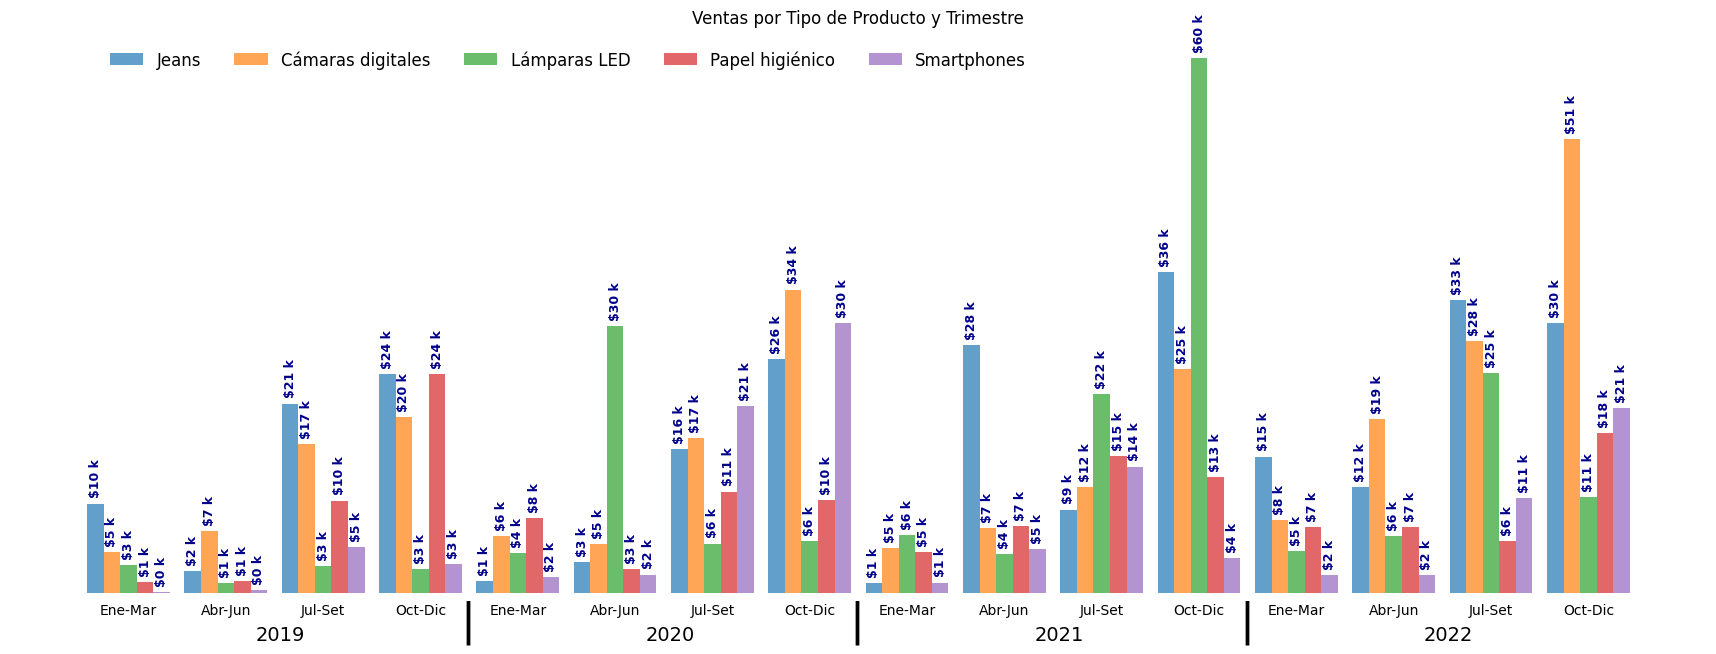

In [108]:
fig, ax = plt.subplots(figsize=(18, 8))
bar_width = 0.17
opacity = 0.7

# Crear barras para cada trimestre
for i, (trimestre, ventas) in enumerate(df_grafica_top_productos.items()):
    posiciones = [j + bar_width * i for j in range(len(df_grafica_top_productos))]
    plt.bar(posiciones, ventas, bar_width, alpha=opacity, label=trimestre)

# Configurar etiquetas y leyenda
plt.xlabel('Tipo de Producto')
plt.ylabel('Ventas')
plt.title('Ventas por Tipo de Producto y Trimestre')
plt.xticks([j + bar_width for j in range(len(df_grafica_top_productos))], df_grafica_top_productos.index, rotation=45)
# plt.legend(loc='best')

legend_x = 0.05  # Ajusta la coordenada x de la leyenda
legend_y = 0.95  # Ajusta la coordenada y de la leyenda
ax.legend(title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=12, ncol=len(df.columns))

# Colocar el valor al final de las barras
for i, (trimestre, ventas) in enumerate(df_grafica_top_productos.items()):
    for j, venta in enumerate(ventas):
        plt.text(j + bar_width * i, venta+1000, f'${venta/1000:.0f} k', ha='center',rotation=90,fontsize=9,fontweight='bold',color='darkblue')


# Añadir espacio entre las barras
plt.tight_layout()
plt.box(False)
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

# Establecer etiquetas personalizadas en el eje x
xticks=['Ene-Mar','Abr-Jun','Jul-Set','Oct-Dic']*4
# xticks=['Trimestre 1\n2019','Trimestre 2\n2019','Trimestre 3\n2019','Trimestre 4\n2019','Trimestre 1\n2020','Trimestre 2\n2020','Trimestre 3\n2020','Trimestre 4\n2020','Trimestre 1\n2021','Trimestre 2\n2021','Trimestre 3\n2021','Trimestre 4\n2021','Trimestre 1\n2022','Trimestre 2\n2022','Trimestre 3\n2022','Trimestre 4\n2022']
plt.xticks([j + bar_width * (len(df_grafica_top_productos.columns) // 2) for j in range(len(xticks))], xticks, rotation=0, ha='center')

# Agrega el año debajo de los ticks correspondientes
años=['2019','2019','2019','2019','2020','2020','2020','2020','2021','2021','2021','2021','2022','2022','2022','2022']
# años=[2019,2019,2019,2019,2020,2020,2020,2020,2021,2021,2021,2021,2022,2022,2022,2022]
for i in range(0, len(años), 4):
    ax.text(1.65+i, -5200,años[i], ha='left',fontsize=14)
    if i<12:
      ax.text(3.75+i, -4500,'|', ha='left',fontsize=32)

# Configuración adicional para quitar las líneas al lado de los ejes
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
plt.show()


In [109]:
def pregunta_5():
  global df_ventas, df_ventas_limpio, df_ventas_año,df_modo_envio,df_ventas_sp
  df_ventas_sp=df_ventas_limpio.copy() # Haciendo la copia
  df_ventas_sp = df_ventas_sp[df_ventas_sp['estado'] == 'São Paulo'] # selección sólo de San Pablo
  df_ventas_sp= (df_ventas_sp[['fecha_pedido','total_venta']]) # establecer estas columnas
  df_ventas_sp.set_index('fecha_pedido', inplace=True) #nuevo index
  return df_ventas_sp
df_ventas_sp= pregunta_5()
df_ventas_sp.head(3)

total_venta
fecha_pedido             
2021-11-09         890.66
2021-11-09        2488.59
2019-11-12        2263.98

Ahora, con los datos de df_ventas_sp, vamos a agrupar las ventas por trimestre, puedes generar esto de la siguiente forma:

In [110]:
df_ventas_sp=df_ventas_sp.resample('Q').agg('sum')
df_ventas_sp.head(3)

total_venta
fecha_pedido             
2019-03-31       27377.18
2019-06-30       33951.90
2019-09-30       90208.89

Ahora, puedes también redondear el valor de la columna total_venta para dejarlo en escala de miles.

In [111]:
df_ventas_sp=round(df_ventas_sp/1000,2)
df_ventas_sp.head(4)

total_venta
fecha_pedido             
2019-03-31          27.38
2019-06-30          33.95
2019-09-30          90.21
2019-12-31         124.09

Finalmente, reseta el indice y guarda el resultado en df_ventas_sp.

In [112]:
df_ventas_sp=df_ventas_sp.reset_index()
df_ventas_sp.head(4)

fecha_pedido  total_venta
0   2019-03-31        27.38
1   2019-06-30        33.95
2   2019-09-30        90.21
3   2019-12-31       124.09

In [113]:
df=df_ventas_sp.copy()
df['es_diciembre'] = df['fecha_pedido'].dt.month == 12
df['año']= df.fecha_pedido.dt.year
df['mes']= df.fecha_pedido.dt.month
df

fecha_pedido  total_venta  es_diciembre   año  mes
0    2019-03-31        27.38         False  2019    3
1    2019-06-30        33.95         False  2019    6
2    2019-09-30        90.21         False  2019    9
3    2019-12-31       124.09          True  2019   12
4    2020-03-31        26.73         False  2020    3
5    2020-06-30        66.15         False  2020    6
6    2020-09-30       109.18         False  2020    9
7    2020-12-31       180.42          True  2020   12
8    2021-03-31        35.74         False  2021    3
9    2021-06-30        95.44         False  2021    6
10   2021-09-30       119.42         False  2021    9
11   2021-12-31       236.50          True  2021   12
12   2022-03-31        61.79         False  2022    3
13   2022-06-30        74.73         False  2022    6
14   2022-09-30       144.52         False  2022    9
15   2022-12-31       307.36          True  2022   12

###2. Visualización:

<function matplotlib.pyplot.show(close=None, block=None)>

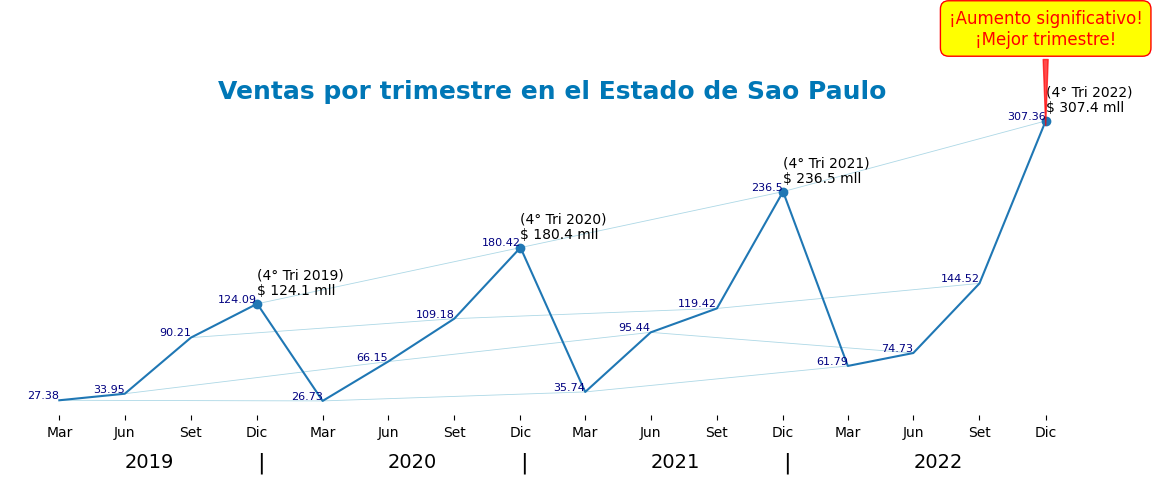

In [114]:
# colores = ['#90e0ef','#90e0ef','#90e0ef','#90e0ef', '#00b4d8','#00b4d8','#00b4d8','#00b4d8', '#0077b6', '#0077b6', '#0077b6', '#0077b6']
# colores = ['#adb5bd','#adb5bd','#adb5bd', '#0077b6','#0077b6','#0077b6', '#dee2e6', '#dee2e6', '#dee2e6','#90e0ef','#90e0ef','#90e0ef']


fig, ax = plt.subplots(figsize=(14,4))

# Iterar sobre los datos para agregar líneas y etiquetas
for i, row in df.iterrows():
    if i + 4 < len(df):
        next_row = df.iloc[i + 4]
        ax.plot([row['fecha_pedido'], next_row['fecha_pedido']], [row['total_venta'], next_row['total_venta']], color='lightblue', linestyle='-', linewidth=0.6)
    ax.text(row['fecha_pedido'], row['total_venta'], row['total_venta'], ha='right', va='bottom', fontsize=8, rotation=0, color='navy')


ax.plot(df_ventas_sp['fecha_pedido'],df_ventas_sp['total_venta'],marker="o",markevery=df['es_diciembre'])
x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
x_labels_años=[2019,2020,2021,2022]*4
x_labels_año = df['año']
ax.set_xticks(df_ventas_sp.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")
# ax.set_xticklabels(x_labels_años, ha="center")
for i in range(3, len(df_ventas_sp["total_venta"]), 4):
  posicionX=ax.get_xticks()[i]
  posicionY=df_ventas_sp["total_venta"][i]
  ax.text(posicionX, posicionY+10, f'$ {posicionY:0.1f} mll')
  ax.text(posicionX, posicionY+25, f'(4° Tri {x_labels_año[i]})')

# Agrega el año debajo de los ticks correspondientes
for i in range(0, len(df_ventas_sp), 4):
    ax.text(df_ventas_sp['fecha_pedido'].iloc[i+1], -40,str(df['año'].iloc[i]), ha='left',fontsize=14)
    if i<12:
      ax.text(df_ventas_sp['fecha_pedido'].iloc[i+3], -40,'|', ha='left',fontsize=16)

plt.title('Ventas por trimestre en el Estado de Sao Paulo', fontweight='bold',fontsize=18,color='#0077b6')
plt.box([])
# plt.xlabel(True)
  # plt.xticks(x_labels_año[i])
plt.ylabel('')
plt.yticks([])

# Agrega una anotación resaltada con annotate
insight = "¡Aumento significativo!\n¡Mejor trimestre!"
bbox_props = dict(boxstyle='round,pad=0.5', fc='yellow', ec='red', lw=1)
plt.annotate(insight, xy=(df_ventas_sp['fecha_pedido'].iloc[15], 300), xytext=(df_ventas_sp['fecha_pedido'].iloc[15], 400),
            ha='center', va='center', fontsize=12, color='red', bbox=bbox_props,
            arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='wedge,tail_width=0.3', lw=1,alpha=.7))



plt.show

In [115]:
df

fecha_pedido  total_venta  es_diciembre   año  mes
0    2019-03-31        27.38         False  2019    3
1    2019-06-30        33.95         False  2019    6
2    2019-09-30        90.21         False  2019    9
3    2019-12-31       124.09          True  2019   12
4    2020-03-31        26.73         False  2020    3
5    2020-06-30        66.15         False  2020    6
6    2020-09-30       109.18         False  2020    9
7    2020-12-31       180.42          True  2020   12
8    2021-03-31        35.74         False  2021    3
9    2021-06-30        95.44         False  2021    6
10   2021-09-30       119.42         False  2021    9
11   2021-12-31       236.50          True  2021   12
12   2022-03-31        61.79         False  2022    3
13   2022-06-30        74.73         False  2022    6
14   2022-09-30       144.52         False  2022    9
15   2022-12-31       307.36          True  2022   12

In [116]:
# list_mes_3=df.loc['mes']
df_mes_3 = df[df['mes'] == 3]
df_mes_6 = df[df['mes'] == 6]
df_mes_9 = df[df['mes'] == 9]
df_mes_12 = df[df['mes'] == 12]
df_mes_3

fecha_pedido  total_venta  es_diciembre   año  mes
0    2019-03-31        27.38         False  2019    3
4    2020-03-31        26.73         False  2020    3
8    2021-03-31        35.74         False  2021    3
12   2022-03-31        61.79         False  2022    3

In [117]:
df_mes_6

fecha_pedido  total_venta  es_diciembre   año  mes
1    2019-06-30        33.95         False  2019    6
5    2020-06-30        66.15         False  2020    6
9    2021-06-30        95.44         False  2021    6
13   2022-06-30        74.73         False  2022    6

In [118]:
!pip install numpy scikit-learn

In [119]:
df.fecha_pedido.info()

<class 'pandas.core.series.Series'>
RangeIndex: 16 entries, 0 to 15
Series name: fecha_pedido
Non-Null Count  Dtype         
--------------  -----         
16 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 256.0 bytes


In [120]:
type(df_mes_3['fecha_pedido'])

pandas.core.series.Series

In [121]:
import pandas as pd

# Definir las listas de fechas
x_predic_3 = ['2020-3-31', '2021-3-31', '2022-3-31', '2023-3-31']
x_predic_6 = ['2020-6-30', '2021-6-30', '2022-6-30', '2023-6-30']
x_predic_9 = ['2020-9-30', '2021-9-30', '2022-9-30', '2023-9-30']
x_predic_12 = ['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31']

# Crear un DataFrame con las fechas
df_fechas = pd.DataFrame({'fechas_3': x_predic_3, 'fechas_6': x_predic_6, 'fechas_9': x_predic_9, 'fechas_12': x_predic_12})

# Convertir las columnas de fechas al formato datetime64[ns]
df_fechas['fechas_3'] = pd.to_datetime(df_fechas['fechas_3'])
df_fechas['fechas_6'] = pd.to_datetime(df_fechas['fechas_6'])
df_fechas['fechas_9'] = pd.to_datetime(df_fechas['fechas_9'])
df_fechas['fechas_12'] = pd.to_datetime(df_fechas['fechas_12'])

# Imprimir el DataFrame
df_fechas

fechas_3   fechas_6   fechas_9  fechas_12
0 2020-03-31 2020-06-30 2020-09-30 2020-12-31
1 2021-03-31 2021-06-30 2021-09-30 2021-12-31
2 2022-03-31 2022-06-30 2022-09-30 2022-12-31
3 2023-03-31 2023-06-30 2023-09-30 2023-12-31

<ipython-input-122-079f4da5a81d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes_3['fecha_pedido_timestamp'] = df_mes_3['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
<ipython-input-122-079f4da5a81d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes_6['fecha_pedido_timestamp'] = df_mes_6['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
<ipython-input-122-079f4da5a81d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

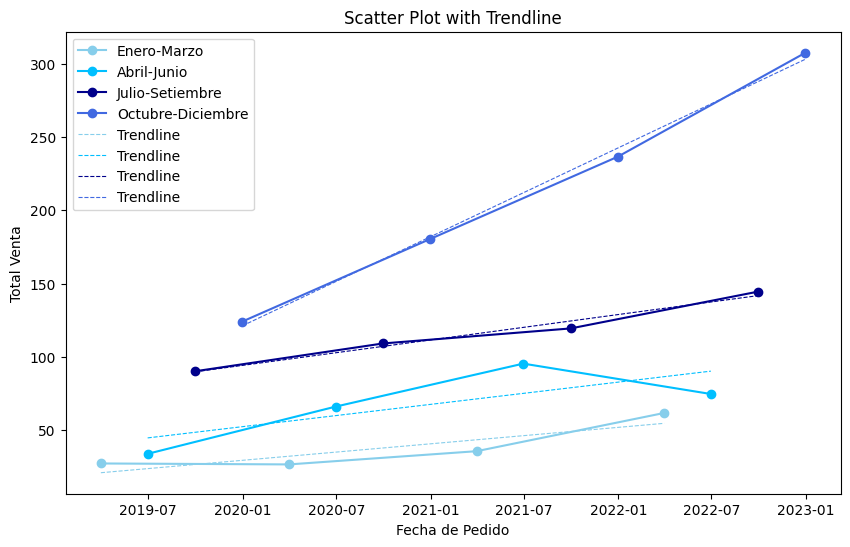

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir 'fecha_pedido' a timestamp:
df_mes_3['fecha_pedido_timestamp'] = df_mes_3['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_6['fecha_pedido_timestamp'] = df_mes_6['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_9['fecha_pedido_timestamp'] = df_mes_9['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds
df_mes_12['fecha_pedido_timestamp'] = df_mes_12['fecha_pedido'].astype(int) / 10**9  # Convert nanoseconds to seconds9

# Extraer X, Y para entrenar el modelo:
x_3 = df_mes_3['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_3= df_mes_3['total_venta'].values

x_6 = df_mes_6['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_6= df_mes_6['total_venta'].values

x_9 = df_mes_9['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_9= df_mes_9['total_venta'].values

x_12 = df_mes_12['fecha_pedido_timestamp'].values.reshape(-1, 1)
y_12= df_mes_12['total_venta'].values

#Crear y ajustar el modelo de regresión lineal:
model_3 = LinearRegression()
model_6 = LinearRegression()
model_9 = LinearRegression()
model_12 = LinearRegression()

model_3.fit(x_3, y_3)
model_6.fit(x_6, y_6)
model_9.fit(x_9, y_9)
model_12.fit(x_12, y_12)

#############  fechas a predecir  #################
x_000=['2020-12-31','2021-12-31','2022-12-31','2023-12-31']
x_000_series = pd.to_datetime(x_000)
x_000_series_reshaped = x_000_series.values.reshape(-1, 1)
x_000_series_reshaped
# y_000=model_12.predict(x_000_series_reshaped)
# print('PREDICCION: ', y_000)

# Prediccion de valores basados en el modelo de regresion lineal:
y_pred_3 = model_3.predict(x_3)
y_pred_6 = model_6.predict(x_6)
y_pred_9 = model_9.predict(x_9)
y_pred_12 = model_12.predict(x_12)


plt.figure(figsize=(10, 6))

plt.plot(df_mes_3['fecha_pedido'], df_mes_3['total_venta'], marker='o', label='Enero-Marzo', color='skyblue')
plt.plot(df_mes_6['fecha_pedido'], df_mes_6['total_venta'], marker='o', label='Abril-Junio', color='deepskyblue')
plt.plot(df_mes_9['fecha_pedido'], df_mes_9['total_venta'], marker='o', label='Julio-Setiembre', color='darkblue')
plt.plot(df_mes_12['fecha_pedido'], df_mes_12['total_venta'], marker='o', label='Octubre-Diciembre', color='royalblue')

# Trazar la lineas de tendencia:
plt.plot(df_mes_3['fecha_pedido'], y_pred_3, color='skyblue', label='Trendline', linestyle='--', linewidth=.8)
plt.plot(df_mes_6['fecha_pedido'], y_pred_6, color='deepskyblue', label='Trendline', linestyle='--', linewidth=.8)
plt.plot(df_mes_9['fecha_pedido'], y_pred_9, color='darkblue', label='Trendline', linestyle='--', linewidth=.8)
plt.plot(df_mes_12['fecha_pedido'], y_pred_12, color='royalblue', label='Trendline', linestyle='--', linewidth=.8)

plt.xlabel('Fecha de Pedido')
plt.ylabel('Total Venta')
plt.title('Scatter Plot with Trendline')
plt.legend()

plt.show()


In [123]:
df_mes_3['fecha_pedido_timestamp']

0     1.553990e+09
4     1.585613e+09
8     1.617149e+09
12    1.648685e+09
Name: fecha_pedido_timestamp, dtype: float64

In [124]:
######## PREDICCION DE TENDENCIA DE VALORES CONSIDERANDO TRIMESTRES POR AÑO   #########

x_predic_3 = ['2020-3-31', '2021-3-31', '2022-3-31', '2023-3-31'] ### predecir en el primer trimestre
x_predic_6 = ['2020-6-30', '2021-6-30', '2022-6-30', '2023-6-30'] ### segundo
x_predic_9 = ['2020-9-30', '2021-9-30', '2022-9-30', '2023-9-30'] ### tercero
x_predic_12 = ['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31'] ### cuarto
df_fechas = pd.DataFrame({'fechas_3': x_predic_3,'fechas_6':x_predic_6,'fechas_9':x_predic_9,'fechas_12':x_predic_12})

df_fechas['fechas_3'] = pd.to_datetime(df_fechas['fechas_3'])
df_fechas['fechas_6'] = pd.to_datetime(df_fechas['fechas_6'])
df_fechas['fechas_9'] = pd.to_datetime(df_fechas['fechas_9'])
df_fechas['fechas_12'] = pd.to_datetime(df_fechas['fechas_12'])

x_predic_3=df_fechas['fechas_3'].astype(int) / 10**9
x_predic_3
x_0000 = x_predic_3.values.reshape(-1, 1)
# x_000 = df_mes_3['fecha_pedido_timestamp'].values.reshape(-1, 1)
x_0000
# x_000
y_0000=model_3.predict(x_0000)
print('PREDICCION: ', y_0000)

PREDICCION:  [32.31201516 43.52334282 54.73467048 65.94599814]


In [125]:
from sklearn.metrics import mean_squared_error, r2_score

# Función para calcular el error y mostrar en pantalla
def calcular_error_y_mostrar(modelo, x, y, nombre_modelo):
    # Realizar predicciones
    y_pred = modelo.predict(x)

    # Calcular el error cuadrático medio
    mse = mean_squared_error(y, y_pred)

    # Calcular el coeficiente de determinación (R cuadrado)
    r2 = r2_score(y, y_pred)

    # Mostrar en pantalla
    print(f'Error para el modelo {nombre_modelo}:')
    print(f'Mean Squared Error (MSE): {round(mse,2)}')
    print(f'R^2: {round(r2,4)}')
    print('\n')

# Calcular y mostrar el error para cada modelo
calcular_error_y_mostrar(model_3, x_3, y_3, 'Enero-Marzo')
calcular_error_y_mostrar(model_6, x_6, y_6, 'Abril-Junio')
calcular_error_y_mostrar(model_9, x_9, y_9, 'Julio-Setiembre')
calcular_error_y_mostrar(model_12, x_12, y_12, 'Octubre-Diciembre')


Error para el modelo Enero-Marzo:
Mean Squared Error (MSE): 45.33
R^2: 0.7764


Error para el modelo Abril-Junio:
Mean Squared Error (MSE): 202.46
R^2: 0.5869


Error para el modelo Julio-Setiembre:
Mean Squared Error (MSE): 9.31
R^2: 0.9758


Error para el modelo Octubre-Diciembre:
Mean Squared Error (MSE): 16.26
R^2: 0.9965


